# Matplotlib

---

**Autor:** César Husillos Rodríguez

**Email:** c.husillos@igme.es

---

Según la documentación oficial (https://matplotlib.org/), *Matplotlib* es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python. También 

*"hace que las cosas fáciles sean fáciles y las difíciles posibles."*

Esta librería permite:
* Crear **gráficos con calidad** de publicación.
* Crea figuras interactivas que puedan hacer zoom, desplazarse y actualizarse.
* **Personalizar el estilo** visual **y el diseño**.
* **Exportar** a muchos formatos de archivo.
* Incrustar gráficos en JupyterLab y en interfaces gráficas de usuario.
* El **uso** en una amplia gama de **paquetes de terceros** creados en Matplotlib (entre ellos *Pandas*, que veremos en siguientes lecciones).

## Tipos de gráficos

### Datos que relacionan dos variables

Tanto aquellos que se refieren a una o a dos variables cualesquiera, sean éstas independientes o tengan alguna dependencia funcional entre ellas $f(x) = y$.

Como ejemplos:

![Ejemplos de gráficas que muestran dos variables](imagenes/matplolib/graficos_pares_variables.jpg)

### Gráficos de distribuciones estadísticas

Que muestran la forma en la que se distribuyen los valores de una de las variables del conjunto de datos que se maneja. Algunos de estos métodos también ajustan a distribuciones estadísticas.

Como ejemplos:

![Ejemplos de gráficas de distribuciones estadísticas](imagenes/matplolib/graficos_distribuciones_estadisticas.jpg)

### Datos en mallas regulares o irregulares

Tanto para valores (o campos) escalares ($Z_{i,j}$) como valores (o campos) vectoriales ($U_{i,j}, V_{i,j}$).

![Ejemplos de gráficas de distribuciones estadísticas](imagenes/matplolib/graficos_de_mallas_regulares_e_irregulares.jpg)

### Información 3D y datos volumétricos

La información 3D es la que se define 
* por relaciones funcionales del tipo $f(x, y) = z$, o 
* por tres coordenadas en el espacio (gráficas de dispersión) sin relación funcional aparente. 

Para trabajar con los datos volumétricos se hace uso de la librería *mpl_toolkist.mplot3d*, y representa datos escalares para cada combinación de las tres coordenadas, $V_{i, j, k}$.

Como ejemplos gráficos:

![Ejemplos de superficies 3D y datos volumétricos](imagenes/matplolib/graficos_de_superficies_y_volumenes_3d.jpg)

Puede acceder a la documentación oficial y descargar los códigos de estas gráficas en este enlace: https://matplotlib.org/stable/plot_types/index

## 1. Conceptos básicos en Matplotlib

### 1.1. Figura (*Figure*)

Representa **todo el área del gráfico**.

La Figura realiza un seguimiento de 

* **todos los ejes** secundarios (*Axes*),
* un grupo de Artistas "especiales" (títulos, leyendas de figuras, barras de colores, etc).

### 1.2. Eje (*Axes*)

Un eje **Axes** es un objeto que **se agrega a una Figura** y que **gestiona una región para graficar datos**. 

Generalmente incluye dos (o tres en el caso de 3D) objetos *Axis* (atención que *Axes* y *Axis* no son lo mismo) que proporcionan marcas en los ejes (llamadas *ticks*) y etiquetas de esas marcas en los ejes para proporcionar escalas para los datos en los Ejes. 

Cada eje también tiene 
* un **título** (establecido mediante *set_title()*),
* una **etiqueta x** (establecida mediante *set_xlabel()*), y
* una **etiqueta y** (establecida mediante *set_ylabel()*).

### 1.3. Objetos de eje (*Axis*)

Estos objetos establecen la escala y los límites. También generan *ticks* (las marcas en el Eje) y *ticklabels* (cadenas que etiquetan los *ticks*). 

La ubicación de las marcas está determinada por un objeto Localizador (*Locator*) y las cadenas de etiquetas de marca están formateadas por un Formateador (*Formatter*). La combinación del localizador y formateador correctos brinda un control muy preciso sobre las ubicaciones y etiquetas de las marcas.

### 1.4. Artista (*Artist*)

Básicamente, todo lo visible en la Figura es un Artista (incluso Figura (*Figure*), Ejes (*Axes*) y objetos Eje (*Axis*)). Esto incluye objetos de texto (*Text*), objetos *Line2D*, objetos de colecciones (*collections*), objetos de parche (*Patch*), etc. Cuando se representa la figura, todos los artistas se dibujan en el lienzo. La mayoría de los Artistas están vinculados a un eje; dicho Artista no puede ser compartido por múltiples Ejes ni movido de uno a otro.

## 2. Partes de una figura


![Partes de una figura en Matplotlib](imagenes/matplolib/matplotlib_partes_de_una_figura.jpg)

(Fuente de la imagen: https://matplotlib.org/stable/users/explain/quick_start.html)

La anterior imagen es muy explicativa. Muestra gráficamente 
* cada una de las **partes del gráfico** y **dónde se ubican**, 
* identifica cada uno de los **objetos que la componen**, y 
* define los **métodos** para realizar modificaciones en cada una de ellas.

## 3. Personalización de elementos gráficos: ¿Cuándo?¿Cómo?

La mayoría de los métodos de graficado tienen opciones de estilo para los *Artistas*. Se puede establecer ese estilo 

* en la **generación**: cuando se llama a un método de dibujo, o 
* **en cualquier momento posterior** a la creación del objeto: desde un "configurador" en el Artista. Estos configuradores hacen uso del gráfico generado y sobreescriben su valor.

## 4. Importación de módulos

Antes de nada, usamos el siguiente "comando mágico" de IPython (sobre lo que opera un Notebook) para establecer que cualquier gráfico que generemos en el Notebook se muestre en el propio Notebook.

In [3]:
%matplotlib inline

Seguidamente, importaremos matplotlib y el resto de módulos que necesitemos.

In [4]:
import matplotlib as mpl
mpl.__version__

'3.8.0'

## 5. Valores por defecto de parámetros generales y estilos

Todos los **parámetros opcionales** de los métodos de graficado de Matplotlib **tienen un valor por defecto** que viene establecido en un diccionario accesible tras importar el módulo *matplotlib*. Se llama **rcParams**.

*rcParams* es un objeto del siguiente tipo:

In [5]:
print(f'Tipo de la variable mpl.crParams ={type(mpl.rcParams)}')

Tipo de la variable mpl.crParams =<class 'matplotlib.RcParams'>


El número de variables que gestiona es el siguiente:

In [6]:
print(f'Número de parámetros de valor predeterminado = {len(mpl.rcParams.keys())}')

Número de parámetros de valor predeterminado = 316


Podemos acceder a este objeto de esta forma:

In [7]:
print(mpl.rcParams)  # diccionario de parámetros de configuración de Matplotlib

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

Y, como con cualquier otra variable/objeto/función de Python, podemos saber más haciendo uso de la función *help(nombre_objeto)* en la consola de comandos cuando ejecutamos el intérprete de Python o celda del Notebook.

In [6]:
help(mpl.rcParams)

Help on RcParams in module matplotlib object:

class RcParams(collections.abc.MutableMapping, builtins.dict)
 |  RcParams(*args, **kwargs)
 |  
 |  A dict-like key-value store for config parameters, including validation.
 |  
 |  Validating functions are defined and associated with rc parameters in
 |  :mod:`matplotlib.rcsetup`.
 |  
 |  The list of rcParams is:
 |  
 |  - _internal.classic_mode
 |  - agg.path.chunksize
 |  - animation.bitrate
 |  - animation.codec
 |  - animation.convert_args
 |  - animation.convert_path
 |  - animation.embed_limit
 |  - animation.ffmpeg_args
 |  - animation.ffmpeg_path
 |  - animation.frame_format
 |  - animation.html
 |  - animation.writer
 |  - axes.autolimit_mode
 |  - axes.axisbelow
 |  - axes.edgecolor
 |  - axes.facecolor
 |  - axes.formatter.limits
 |  - axes.formatter.min_exponent
 |  - axes.formatter.offset_threshold
 |  - axes.formatter.use_locale
 |  - axes.formatter.use_mathtext
 |  - axes.formatter.useoffset
 |  - axes.grid
 |  - axes.gr

Como en cualquier diccionario de Python, se accede al valor de cada uno de sus elementos a través de su clave correspondiente en la forma ya conocida:

In [7]:
mpl.rcParams['savefig.dpi'] # valor actual de la resolución del gráfico cuando se graba en el disco. ('dpi' = dots per inch)

'figure'

Se puede cambiar el valor por defecto asociado a una clave de la forma siguiente:

In [8]:
mpl.rcParams['savefig.dpi'] = 150 # cambio del valor actual
# muestro el valor que tiene ahora
print(mpl.rcParams['savefig.dpi'])

150.0


También es posible modificar parámetros por defecto usando la función *update()* de *mpl.rcParams*, al que se le pasa un diccionario como parámetro con las claves disponibles en *mpl.rcParams* y los nuevos valores a establecer.

In [19]:
mpl.rcParams.update({'savefig.dpi': 200})
mpl.rcParams['savefig.dpi']

200.0

In [111]:
# help(mpl.rc)

**NOTA:** **Estos parámetros por defecto se aplican a cualquier gráfico**, por lo que si desea personalizar uno sólo de ellos no es recomendable modificar el diccionario *mpl.rcParams*. Mejor usar los parámetros que ofrecen los *Artistas* para su gráfico en concreto.

Puede hacer **cambios individuales** (como hemos visto ya) **o grupales** en el diccionario *mpl.rcParams*. 

Si se fija en celdas anteriores, al imprimir la variable *mpl.rcParams* las claves aparecen categorizadas en la forma

o incluso como 

In [9]:
print(mpl.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

Puede **cambiar todas o parte de las variables del grupo** generando un diccionario y pasándoselo a la función 

Dado que una imagen vale más que mil palabras, nos adelantamos un poco a los contenidos y pintamos una línea como muestra del comportamiento original.

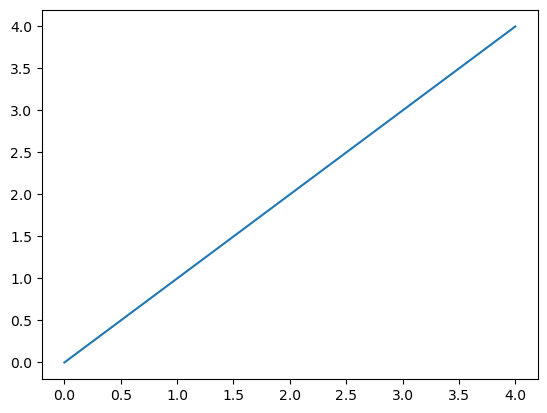

In [24]:
from matplotlib import pyplot as plt
import numpy as np # como forma de generar coordenadas x, y, z para nuestros gráficos

x = np.arange(5)
fig, ax = plt.subplots()
ax.plot(x, x)
plt.show()

A continuación generamos el código de ejemplo donde se establecen nuevos parámetros por defecto para las líneas (*lines*):

In [25]:
# diccionario con los nuevos valores por defecto
valores_defecto_lineas = {'linestyle': '--', 'linewidth': 10}

# aplicamos la nueva parametrización al grupo "lines" para usar en nuestros siguiente gráficos
mpl.rc('lines', **valores_defecto_lineas)

In [26]:
# Comprobamos que los cambios se han realizado correctamente
print('linestyle =', mpl.rcParams['lines.linestyle'])
print('linewidth =', mpl.rcParams['lines.linewidth'])

linestyle = --
linewidth = 10.0


Y realizamos el mismo gráfico que antes

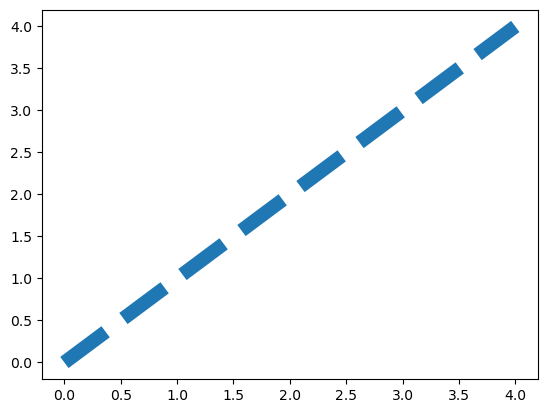

In [27]:
x = np.arange(5)
fig, ax = plt.subplots()
ax.plot(x, x)
plt.show()

**Resumen de variables y funciones que tienen relación con los parámetros por defecto de Matplotlib**

| Función | Definición simplificada | Descripción |
| :--- | :--- | :-- |
| rc  | *mpl.rc(grupo, diccionario)*  |  Para actualizar los parámetros almacenados en *mpl.rcParams*.  |
| rcParams.update | *mpl.rcParams.update(diccionario)*  |  Para actualizar los parámetros almacenados en *mpl.rcParams*.  |
| rcdefaults | *mpl.rcdefaults()* | Para restaurar los parámetros a los valores originales.  |

Para **restaurar los valores de los parámetros por defecto** hay que pasar el argumento *mpl.rcParamsDefault* a la función *mpl.rcParams.update()*.

In [28]:
mpl.rcParams.update(mpl.rcParamsDefault) # establece los valores por defecto de los parámetros.

In [29]:
mpl.rcParams['savefig.dpi']

'figure'

También se puede restaurar los parámetros al estilo por defecto de Matplotlib llamando a la función *mpl.rcdefaults()*.

In [30]:
mpl.rcParams['savefig.dpi'] = 500
print('dpi modificado =', mpl.rcParams['savefig.dpi'])

dpi modificado = 500.0


In [31]:
mpl.rcdefaults()

In [32]:
print('dpi tras restauración a valores originales =', mpl.rcParams['savefig.dpi'])

dpi tras restauración a valores originales = figure


Como siempre, si necesita de información más detallada puede consultar la documentación de una función, variable y objeto mediante la función *help()*.

In [33]:
# help(mpl.rcdefaults)

**NOTA:** Matplolib dispone de estilos predefinidos para la representación gráfica. Establecen a nuevos valores un amplio conjunto de parámetros por defecto para ajustar la visualización a una apariencia concreta. 

Aquí tiene toda la información disponible: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

## 6. Matplotlib en acción

Aunque Matplotlib proporciona varios puntos de entrada a la librería a través de diferentes APIs (*Aplication Programing Interface*), esencialmente existen dos formas de uso*:

* Una **stateful API** (API con estados) de alto nivel.
* Una **API orientada a objetos**. 

Ambas implementaciones están disponibles a través del módulo ***matplotlib.pyplot***.

La primera aproximación, es más sencilla, lo que la hace perfecta para generar gráficos rápidamente. El problema es que la personalización de los gráficos es limitada.

**En este notebook la generación de gráficas se va a implementar usando la orientación a objetos** (*Figure*, *Axes*...). Es también la metodología recomendada por *Matplotlib*. Puede que sea un poco más complejo de implementar, pero a cambio tendremos flexibilidad para controlar todas y cada una de las opciones de personalización. Además, la mayor parte de la documentación de la librería y de los ejemplos disponibles siguen esta  implementación, por lo que le resultará muy fácil adaptarlos a sus conjuntos de datos.

(Más información aqui: https://matplotlib.org/stable/api/index.html)

Vamos ahora con la parte práctica. 

Esta será la forma en la que importaremos *matplotlib* y su módulo *pyplot*.

In [34]:
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np

In [35]:
mpl.__version__

'3.8.0'

In [36]:
print(mpl.get_backend())

module://matplotlib_inline.backend_inline


Información sobre backends disponibles en esta dirección web: https://matplotlib.org/stable/api/index_backend_api.html

### 6.1. Generación de gráfica sencilla

Partimos de el siguiente conjunto de datos: una parábola generada a partir de arrays y funciones de NumPy.

In [38]:
# Datos de partida
x = np.linspace(-4, 4, 50)
y = -2 + 0.5 * np.power(x, 2)

Debemos tener en cuenta el sistema de coordenadas de la figura y los ejes a la hora de ubicar este último en el área gestionada por la primera.
![Imagen del sistema de coordenadas que distribuye el área de dibujo](imagenes/matplolib/coordenadas_figura_ejes.jpg)

In [43]:
# Generación de los artistas básicos
# creación de la figura
fig = plt.Figure(figsize=(6, 4)) # figsize establece la (anchura, altura) en pulgadas

# agregamos un eje a la figura con el método add_axes y las coordenadas de la esquina inferior izquierda (2 valores), la anchura y la altura.
ax = fig.add_axes((0.15, 0.15, 0.8, 0.8))

# graficado de la parábola. De las múltiples posibilidades de representación 
# elegimos "plot" que pinta una línea dada por las coordenadas x e y.
ax.plot(x, y)

# guardamos el resultado de la figura usando su método "savefig". El formato del fichero 
# viene dado por defecto por su extensión. También hemos establecido una resolución de 
# 100 puntos por pulgada (donde 'dpi' se refiere a 'dots per inch')
fig.savefig('mi_primer_grafico.jpg', dpi=100)

Sólo hemos necesitado tres líneas para generar el gráfico de nuestra parábola $y = \frac{1}{2} x^2 - 2$.

A continuación se muestra en el Notebook el gráfico en formato jpg generado. Puede verlo en su sistema de ficheros, en el mismo directorio donde está este Notebook (*matplotlib.ipynb*).

![Primer gráfico con Matplotlib](mi_primer_grafico.jpg)

El procedimiento que hemos desarrollado es el más básico del trabajo con la API orientada a objetos de Matplotlib.

De ahora en adelante usaremos funciones de esa API de mayor nivel. Por ejemplo, generaremos el objeto *Figure* y su/s objeto/s *Axes* asociados con la función *plt.subplots()* en la forma

In [44]:
# Datos de partida: parábola desplazada en el eje Y
x = np.linspace(-4, 4, 50)
y = -2 + 0.5 * np.power(x, 2)

In [45]:
fig, ax = plt.subplots() # Genera la figura y su eje asociado.
ax.plot(x, y) # genero la línea que representa los puntos (x, y) de la parábola
plt.show() # muestra la gráfica en el backend seleccionado. En nuestro caso el propio Notebook.

Ahora sólo he necesitado 2 líneas para generar la gráfica y una para mostrarla. ¡La cosa promete!

La simple llamada a la función *plt.subplots()* genera la figura (objeto *Figure*) y le asocia un objeto de tipo eje (*Axes*). Devuelve ambos en forma de tupla. En el código anterior, dicha tupla se asocia a las variables *fig* y *ax*.

**NOTA:** Para facilitar la asimilación de contenidos, vamos a ir complicando gradualmente el gráfico, agregando *Artistas* y personalizaciones.

### 6.2. Personalización de la representación gráfica

La personalización de una gráfica **es tan o más importante que la propia gráfica**.

Por ejemplo, el uso de diferentes colores, anchos de línea y estilos de línea son herramientas importantes para hacer que un gráfico sea **fácilmente legible**. En un gráfico con una gran cantidad de líneas, podemos usar una combinación de colores y estilos de línea para hacer que cada línea sea identificable de forma única. La propiedad de ancho de línea se podría usar para dar énfasis a líneas importantes.


Podemos **personalizar** las propiedades de **la línea**
que representa nuestra parábola. Por ejemplo, cambiaremos 
* el trazado a una línea discontínua,
* el color a verde,
* el grosor a 3 puntos,
* la transparencia de la línea, y
* agregaremos los puntos que generan dicha parábola en forma de cuadrados con su interior de color rojo.

**NOTA:** Esta selección de propiedades no mejora la visualización que es lo que debe buscar. Se hace por propósitos didácticos.

In [45]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5, marker='s', markerfacecolor='red')
plt.show()

En la siguiente tabla, se muestran las propiedades más usuales de una línea generada con el método *plot* de un objeto *Axes*.

**Propiedades básicas de una línea**

| Argumento | Ejemplo de valores | Descripción |
| :-- | :-- | :--- |
|color | El color puede ser dado por una cadena de caracteres con el nombre de un **color en inglés**, como “red,” “blue,” etc., o como una combinación de colores RGB (Red Green Blue) codificado en la forma “#rrggbb.” | Especificación de color.|
|alpha | Número float entre 0.0 (completamente transparente) y 1.0 (completamente opaco).| Cantidad de transparencia.|
|linewidth, lw | Número float . | La anchura de la línea.|
|linestyle, ls | “-” – sólido<br /> “--” – línea discontínua<br /> “:” – línea punteada <br /> “.-” – línea con mezcla de puntos y segmentos de línea| El estilo de la línea.|
| marker | +, o, * = cruz, círculo, estrella <br />s = cuadrado <br /> . = punto pequeño| Cada punto de la gráfica, este conectado o no con otros, puede ser representado con un marcador dado por este argumento *marker*.|
| markersize | Número de tipo float. | El tamaño del marcador.|
|markerfacecolor | Misma especificación de color que el parámetro *color*. | El color de relleno del marcador.|
|markeredgewidth | Número de tipo float. | La anchura de la línea que limita al símbolo del marcador.|
|markeredgecolor | Misma especificación de color que el parámetro *color*. (ver más arriba) | El color de la línea que limita al símbolo del marcador.|

Más información sobre colores en este enlace: https://matplotlib.org/stable/users/explain/colors/colors.html

Más información sobre marcadores en este enlace: https://matplotlib.org/stable/api/markers_api.html

#### 6.2.1. Título y etiquetas de los ejes

Avancemos un poco más y agreguemos más información al gráfico. Vamos a establecer un título para el gráfico y las etiquetas de los ejes x e y.

In [51]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5, marker='s', markerfacecolor='red')

# Generamos el título
ax.set_title('Mi primera parábola')

# Generamos una etiqueta en el eje X
ax.set_xlabel('Eje de abscisas')

# Generamos una etiqueta en el eje Y
ax.set_ylabel('Eje de ordenadas')

# mostramos el gráfico
plt.show()

Fíjese que **estas personalizaciones corresponden a métodos del objeto *Axes*** que, a su vez, está asociado a la figura *fig* de nuestro gráfico.

#### 6.2.2. Personalización de las fuentes.

Podemos cambiar entre otras
* el tipo de fuente, 
* la alineación, 
* el estilo, 
* el color y
* el tamaño 

de cualquier texto que se muestre en nuestra gráfica.

Para ello, se usan los parámetros de las funciones que agregan ese texto en el gráfico.

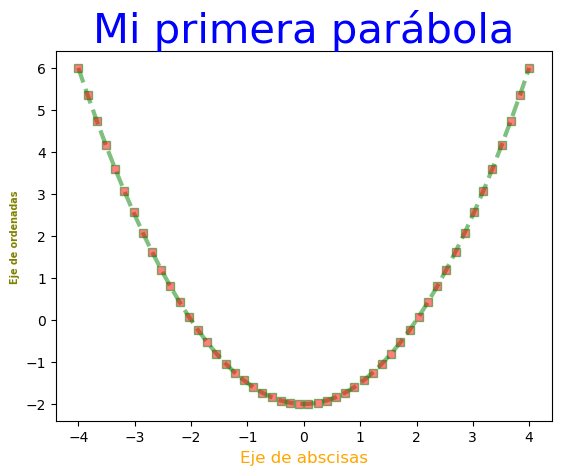

In [52]:
# Generación de los artistas básicos: figura y ejes asociados en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5, marker='s', markerfacecolor='red')

# Generamos el título y modificamos a nuestro gusto algunos de los parámetros asociados a la fuente
ax.set_title('Mi primera parábola', fontsize=30, fontweight='medium', color="#0000FF")

# Generamos una etiqueta en el eje X de nuestro objeto *Axes* asociado a la figura y cambiamos propiedades de la fuente
ax.set_xlabel('Eje de abscisas', fontsize='large', fontweight='light', color="orange")

# Generamos una etiqueta en el eje X de nuestro objeto *Axes* asociado a la figura y cambiamos propiedades de la fuente
ax.set_ylabel('Eje de ordenadas', fontsize='x-small', fontweight='semibold', color="olive")

# mostramos el gráfico
plt.show()

**Algunos parámetros de las fuentes para los textos**

| Parámetro | Valor por defecto | Descripción|
| :--- | :--- | :--- |
| fontsize | rcParams['axes.titlesize']  |  Número de tipo 'float' o una cadena de caracteres: 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'  |
| fontweight | rcParams['axes.titleweight']  |  Un valor numérico entre 0-1000, o cadenas de caracteres: 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'  |
| color | rcParams['axes.titlecolor']  | Puede ser una cadena de caracteres con el nombre de un color (en inglés) como "red",  "blue" etc., o un color en codificación hexadecimal en la forma "#aabbcc" (dos primero caracteres para rojo, dos de en medio para azul y los dos últimos para verde). |
| verticalalignment |  'baseline' |  Cadena de caracteres. Posibles valores: 'baseline', 'bottom', 'center', 'center_baseline', 'top'  |
| horizontalalignment | 'center'  |  Cadena de caracteres. Posibles valores: 'center', 'left', 'right'  |

Como siempre, se recomienda acceder a la ayuda de Python para obtener más información sobre cualquier objeto/función de interés.

In [54]:
# help(ax.set_title)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 1 y 2.

---

#### 6.2.3. Líneas horizontales y/o verticales

Se usan habitualmente para destacar una coordenada en el eje de abscisas y/o de ordenadas. También para dividir zonas del gráfico donde los datos representados se comportan de forma diferente.

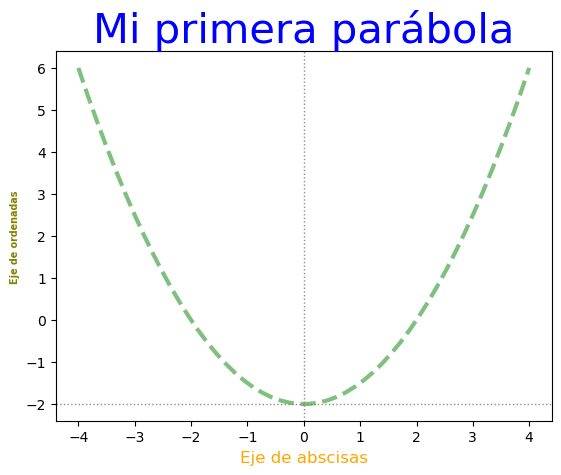

In [55]:
# Destacar líneas horizontales (ax.axhline) y verticales (ax.axvline) en determinadas coordenadas de los ejes del gráfico

# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5)

# pintamos una línea horizontal en la coordenada y = -2. Asignamos algunas propiedades a esa línea.
ax.axhline(-2, color='gray', lw=1, ls=':', alpha=0.9)

# pintamos una línea vertical en la coordenada x = 0. Asignamos algunas propiedades a esa línea.
ax.axvline(0, color='gray', lw=1, ls=':', alpha=0.9)

# resto de parámetros...
ax.set_title('Mi primera parábola', fontsize=30, fontweight='medium', color="#0000FF")
ax.set_xlabel('Eje de abscisas', fontsize='large', fontweight='light', color="orange")
ax.set_ylabel('Eje de ordenadas', fontsize='x-small', fontweight='semibold', color="olive")

# mostramos el gráfico
plt.show()

In [49]:
# Hay muchísimas opciones posibles de personalización (*ver apartado: Other Parameters*)
# help(ax.axvline)

#### 6.2.4. Textos y anotaciones en el gráfico

Vamos ahora a trabajar con texto y anotaciones.

Estos *Artistas* ayudan a fijar la atención del usuario sobre puntos concretos de la gráfica. También aclaran su contenido o muestran valores relevantes.

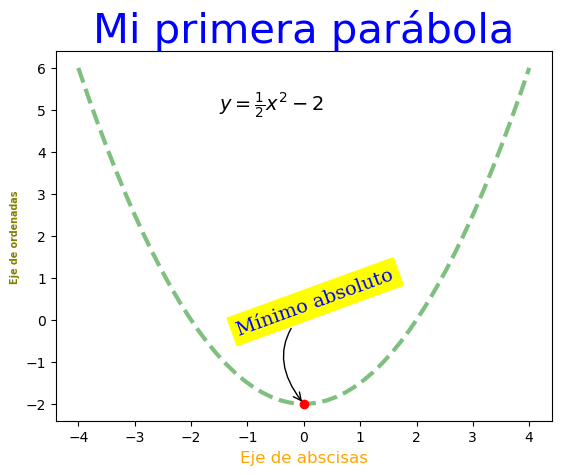

In [50]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5)

# resaltado de un punto de interés en las coordenadas x=0, y=-2
ax.plot(0, -2, color='red', marker="o")

# anotación: incluye el texto, las coordenadas del punto de interés y la posición relativa del texto 
#            respecto del punto de interés, entre otras propiedades.
ax.annotate("Mínimo absoluto", fontsize=14, family="serif", \
            xy=(0, -2), xycoords="data", rotation=20, backgroundcolor='yellow', \
            color='blue', xytext=(-50, +50), textcoords="offset points", \
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))
                            
# agregamos texto (la fórmula de nuestra parábola) en las coordenadas x=-1.5, y=5. 
# Asignamos algunas propiedades al texto también.
ax.text(-1.5, 5, r'$y=\frac{1}{2} x^2 - 2$', fontsize=14, family="serif")

# título y etiquetas de los ejes
ax.set_title('Mi primera parábola', fontsize=30, fontweight='medium', color="#0000FF")
ax.set_xlabel('Eje de abscisas', fontsize='large', fontweight='light', color="orange")
ax.set_ylabel('Eje de ordenadas', fontsize='x-small', fontweight='semibold', color="olive")

# mostramos la gráfica
plt.show()

En la llamada a *annotate*, los parámetros asociados a las propiedades de la flecha se han dado a través de un diccionario. 

Si vamos a usar las mismas propiedades en varios gráficos dentro del mismo notebook o script, resulta más conveniente generar un diccionario y pasarlo a todas las llamadas a esa función que se realicen en nuestro código en la forma

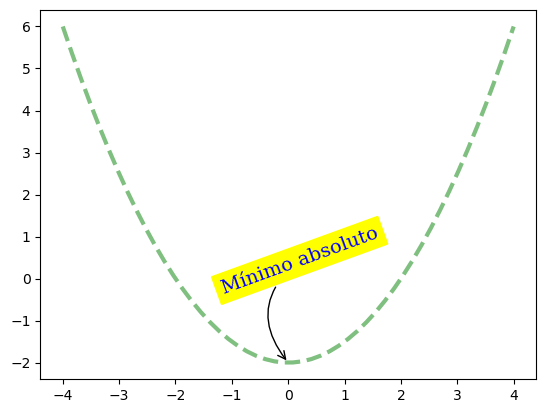

In [51]:
flecha_personalizada = {'arrowstyle': "->", 'connectionstyle': "arc3, rad=.5"}

fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5)
ax.annotate("Mínimo absoluto", fontsize=14, family="serif", \
            xy=(0, -2), xycoords="data", rotation=20, backgroundcolor='yellow', \
            color='blue', xytext=(-50, +50), textcoords="offset points", \
            arrowprops=flecha_personalizada)
plt.show()

Como siempre que hay dudas, consulte la documentación sobre la función correspondiente usando *help()* en Python.

In [65]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs) method of matplotlib.axes._axes.Axes instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : single or two-tuple of str or `.Artist` or `.Transform` or callable, default: 'data'
    
  

#### 6.2.5. Malla (grid) en el gráfico

Para facilitar la interpretación gráfica, vamos a agregar una malla. Facilita ubicar de forma más precisa para el usuario los valores de y para cada x en nuestras figuras.

In [66]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5)

ax.grid() # este método de *Axes* pinta una malla en la gráfica

# título y etiquetas de los ejes
ax.set_title('Mi primera parábola')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# mostramos el gráfico
plt.show()

La malla es personalizable también en cuanto a las propiedades de las líneas y su posiciones.

In [52]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, alpha=0.5)
ax.set_title('Mi primera parábola')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')
ax.grid(which='major', axis='y', color='gray', linestyle='-', linewidth=0.5, alpha=0.8) # personalizamos la malla
plt.show()

**Parámetros del método grid**

| Parámetro | Valor por defecto | Posibles valores | Descripción |
| :--- | :--- | :--- | :--- |
| visible | True  | True o False | Si es True, la malla se muestra en el área del gráfico. |
| which | 'major' | 'major' o 'minor' o 'both' | La malla parte de los puntos principales, secundarios o ambos de los ejes. |
| axis | 'both' |'both' o 'x' o 'y' | Si parten de los dos ejes, sólo del eje 'x' o sólo del eje 'y'.  |
| \*\*kwards | None | Diccionario | Diccionario con parámetros y valores para la personalización de las líneas de la malla. |

In [53]:
# help(ax.grid)

#### 6.2.6. Representación de varias gráficas en la misma figura

Sigamos avanzando. Vamos a agregar una línea más a la que ya teníamos. Es tan sencillo como implementar el código que muestra la siguiente celda.

In [55]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# grafica de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, \
        alpha=0.5, marker='s', markerfacecolor='red')
# grafica de una línea recta en el mismo eje (Axes) que la parábola
ax.plot(x, x, ls='-', color='blue', lw=2, alpha=1)

# Título y etiquetas de los ejes
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# mostramos la nueva figura
plt.show()

#### 6.2.7. Generación y manipulación de la leyenda del gráfico

Cuando en un gráfico se representan **varios conjuntos** de datos es **buena práctica usar una leyenda**. Permite asociar cada línea o grupo de puntos a su conjunto de datos.

La forma de generar una etiqueta, consiste en agregar un texto a un parámetro llamado *label* de la función que genera la representación. Vea el siguiente ejemplo.

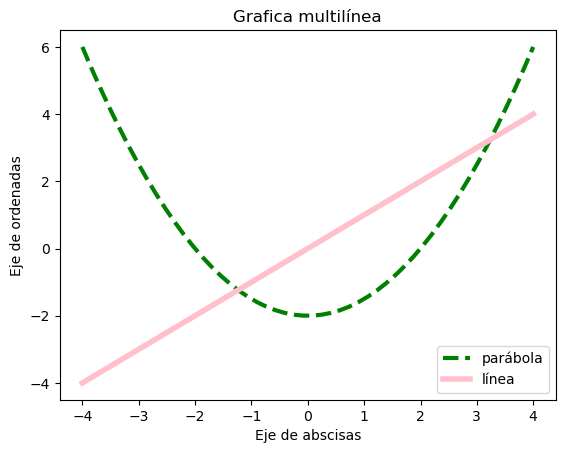

In [57]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
ax.plot(x, y, ls='--', color='green', lw=3, label='parábola') # Atención al parámetro 'label'
ax.plot(x, x, ls='-', color='pink', lw=4, label='línea') # Atención al parámetro 'label'
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')
ax.legend() # este método genera la leyenda. Usa los textos de los parámetros 'label' de las llamadas a ax.plot.
plt.show()

La leyenda también es personalizable. Entre otros, se pueden establecer
* el **orden en el que se muestran** las etiquetas,
* la **posición de la leyenda*+ en la figura, 
* el **tamaño del texto**, y
* el **tamaño de las líneas o puntos** que se representan. 

In [58]:
# help(ax.plot)

Para el primer cambio propuesto, hemos de guardar el retorno de la función *ax.plot* en una variable. Retorna una lista de todas las lineas que ha generado. Como sólo nos interesa el primer elemento de la lista que devuelve, sólo almacenamos ese valor en la variable.

In [62]:
# explicación del código que verá para asignar las variables 'parab' y 'linea' dos celdas más abajo
lista = ['primero']
elemento, = lista
# equivalente a 
# elemento = lista[0]
print(elemento)

primero


Posteriormente, en la llamada a la función *ax.legend*, pasamos al parámetro *handles* una lista con el orden deseado de las variables devueltas por las llamadas a *ax.plot*. 

El siguiente ejemplo le aclarará esta explicación. Pretendemos:
* cambiar el orden de las etiquetas de la leyenda.
* personalizar esas etiquetas después de haber generado las correspondientes líneas.

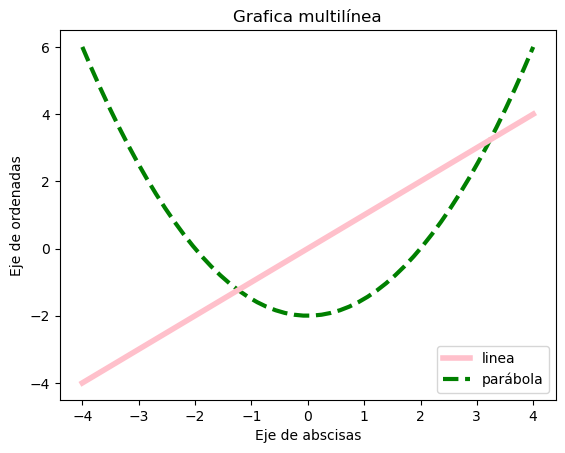

In [63]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# graficado de la parábola
parab, = ax.plot(x, y, ls='--', color='green', lw=3, label='parábola') # Guardamos el retorno de ax.plot en una variable
# grafica de la línea
linea, = ax.plot(x, x, ls='-', color='pink', lw=4) # Guardamos la linea generada en la variable 'linea' (manejador).
# Fíjese en que no hay establecida una etiqueta para esta 'línea'.
# etiquetamos a posteriori la gráfica asociada a la variable "linea" que es el manejador (handle) devuelto por 'ax.plot'
linea.set_label('linea') 

# título y etiquetas de los ejes
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# Agregamos la leyenda
ax.legend(handles=[linea, parab]) # usamos los manejadores devueltos por "ax.plot" para establecer
                                  # el orden de aparición en la leyenda.

#mostramos el gráfico
plt.show()

##### 6.2.7.1. Posición de la leyenda en el gráfico y su reetiquetado

In [78]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# grafica de la parábola
parab, = ax.plot(x, y, ls='--', color='green', lw=3, label='parábola')

# gráfica de la línea
linea, = ax.plot(x, x, ls='-', color='pink', lw=4, label='linea')

# título y etiquetas de los ejes
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# Cambiamos los textos de las gráficas por valores diferentes en este gráfico, y
# establecemos una ubicación concreta para la leyenda (parámetro 'loc')
ax.legend([linea, parab], ['Nueva etiqueta línea', 'Nueva etiqueta parábola'], \
          loc='upper center')
plt.show()

**Posiciones personalizables para la leyenda**

Todas estas opciones son valores posibles para el parámetro *loc* del método *legend*.

| Posición como cadena de caracteres | Posición como código numérico | Descripción |
| :--- | :--: | :--- |
| 'best'       |    0  | Mejor posición tal que se superpone mínimamente con otros Artistas.|
|'upper right' |    1  | Arriba y a la derecha. |
|'upper left'  |    2  | Arriba y a la izquierda. | 
|'lower left'  |    3  | Abajo a la izquierda. |
|'lower right' |    4  | Abajo a la derecha. |
|'right'       |    5  | A la derecha. |
|'center left' |    6  | En el centro y a la izquierda. |
|'center right'|    7  | En el centro y a la derecha.|
|'lower center'|    8  | Abajo y en el centro. |
|'upper center'|    9  | Arriba y en el centro. |
|'center'      |    10 | En el centro. |


#### 6.2.8. Establecimiento del rango de valores en los ejes

Ahora vamos a establecer el rango de valores de los ejes.

In [80]:
fig, ax = plt.subplots() # Generación de los artistas básicos: figura y sus ejes en una misma función

# grafica de la parábola
parab, = ax.plot(x, y, ls='--', color='green', lw=3, label='parábola')
# gráfica de la línea
linea, = ax.plot(x, x, ls='-', color='pink', lw=4, label='linea')

# título y etiquetas de los ejes
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# mostramos la leyenda
ax.legend()

# Limitamos el rango de los ejes
ax.set_xlim(-2, 4) # limitamos el rango del eje X
ax.set_ylim(-3, 8) # limitamos el rango del eje Y

plt.show()

In [81]:
# help(ax.legend)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 4 y 5.

---

#### 6.2.9. Marcas principales y secundarias en los ejes y etiquetado personalizado

Cada objeto Eje (*Axes*) tiene asociados dos o tres objetos *Axis*. Estos últimos se relacionan con cada una de las coordenadas del gráfico *(x, y(, z))*.

Como mencionamos en la introducción de este tema, los objetos *Axis* gestionan la escala y los límites de valores representados. También generan las **marcas visibles en los ejes** (*ticks*) y las **cadenas de texto que etiquetan esas marcas en los ejes** (*ticklabels*).

Los *ticks* de los ejes son una parte importante de la apariencia general de un gráfico. Al preparar gráficos de calidad para su publicación, a menudo es necesario tener un control detallado sobre ellos.

El módulo *mpl.ticker* de Matplotlib proporciona un sistema de gestión de *ticks* general y extensible. Proporciona un control total de su ubicación. No lo trataremos en este módulo pero se menciona para que el alumno investigue sobre él en caso de necesitarlo.

Matplotlib distingue entre 
* **marcas principales** (*mayor ticks*) y 
* **marcas auxiliares** (*minor ticks*). 

De forma predeterminada, **cada marca principal tiene una etiqueta correspondiente** y las distancias **entre las marcas principales se pueden dividir aún más con marcas auxiliares que no tienen etiquetas**, aunque esta función debe activarse explícitamente.

Vamos a generar los puntos principales y los secundarios en los ejes de nuestra gráfica.

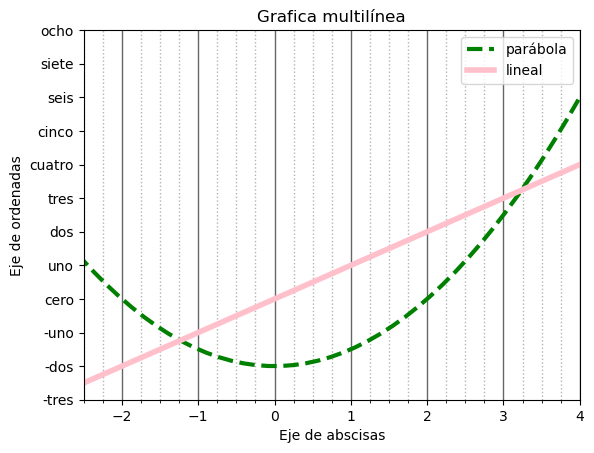

In [64]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

# grafica de la parábola
parab, = ax.plot(x, y, ls='--', color='green', lw=3, label='parábola') 
#gráfica de línea
linea, = ax.plot(x, x, ls='-', color='pink', lw=4, label='lineal')
# título y etiquetas de los ejes
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')
# generamos la leyenda
ax.legend()
# limitamos el rango de valores en los ejes
ax.set_xlim(-2, 4) # limitamos el rango del eje X
ax.set_ylim(-3, 8) # limitamos el rango del eje Y

# Establecemos las posiciones de las marcas visibles auxiliares en posiciones concretas para el eje X
ax.set_xticks(np.arange(-2.5, 4, 0.25), minor=True)
# Establecemos las etiquetas de texto asociadas a las marcas principales del eje Y en posiciones concretas
ax.set_yticks(np.arange(-3, 9, 1).astype('int'), \
              ['-tres', '-dos', '-uno', 'cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho'])

# Y como colofón, generamos 
# una malla personalizada con origen en las marcas auxiliares para el eje X 
ax.grid(which='minor', axis='x', color='gray', linestyle=':', linewidth=1, alpha=0.6)
# una malla personalizada con origen en las marcas principales para el eje X
ax.grid(which='major', axis='x', color='black', linestyle='-', linewidth=1, alpha=0.6)

# mostramos el gráfico
plt.show()

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 5.

---

#### 6.2.10. Generación de un eje Y adicional en el gráfico

Supongamos que queremos representar dos gráficos que tienen los mismos valores de abscisas (eje X) pero valores muy dispares en cuanto a magnitud en el eje de ordenadas (eje Y).

Pongamos por ejemplo, un polinomio de orden 4 frente a uno de orden 1 (lineal).

In [83]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots() 

x = np.linspace(-5, 5, 50)

# graficado de polinomio de orden 4
orden4, = ax.plot(x, np.power(x, 4), label='Orden 4')
# graficado de polinomio de orden 1
orden1, = ax.plot(x, x, color='red', label='Orden 1')

# Generamos el título y las etiquetas de los ejes X e Y
ax.set_title('Grafica multilínea')
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Eje de ordenadas')

# Generamos la leyenda
ax.legend(loc='best')

# Mostramos el gráfico
plt.show()

Como vemos, la dependencia de la gráfica de orden 1 está enmascarada por la gran variabilidad de la de orden 4.

Ante esta situación tenemos dos posibilidades:
1. Generar dos gráficas.
2. Generar otro eje Y, situarlo a la derecha en la figura y representar una gráfica frente a un eje y la otra frente a al otro. 

Trataremos el supuesto 1 más adelante. 

La opción 2 implica el uso del *twinx* del eje (*Axes*) existente que genera otro con el que comparte el eje X. Veamoslo en el siguiente ejemplo.

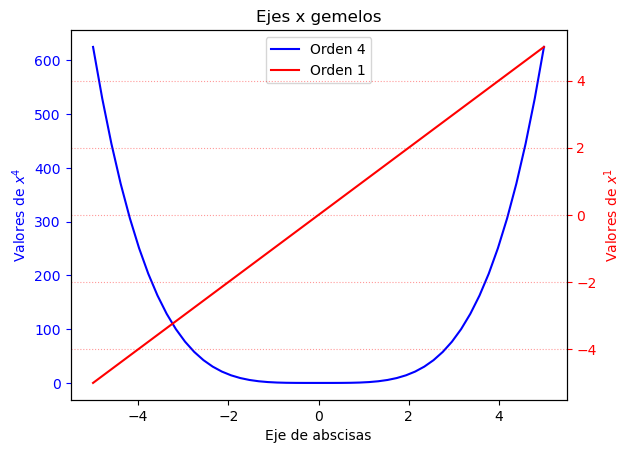

In [66]:
# Coordenadas x de mi función
x = np.linspace(-5, 5, 50)

# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, ax = plt.subplots()

# graficado de la parábola
orden4 = ax.plot(x, np.power(x, 4), color='blue', label='Orden 4')

# Establecemos las etiquetas para el objeto 'ax'
ax.set_xlabel('Eje de abscisas')
ax.set_ylabel('Valores de $x^4$', color='blue')
# Ahora, coloreamos en azul las marcas del eje 'Y' de nuestro objeto 'ax'
ax.tick_params('y', colors='blue')

# ESTA PARTE ES IMPORTANTE: genero un eje 'ax2' gemelo de 'ax'. Ambos comparten el eje X (twinx)
ax2 = ax.twinx()

# graficado de la dependencia lineal en este eje gemelo 'ax2'
orden1 = ax2.plot(x, x, color='red', label='Orden 1')

# Establezco las etiquetas del eje 'ax2'
ax2.set_ylabel('Valores de $x^1$', color='red')
# Coloreo de rojo las marcas del *axis* Y asociado a 'ax2'
ax2.tick_params('y', colors='red')

# y genero una maya de color rojo para el eje 'ax2'
ax2.grid(color='red', linestyle=':', alpha=0.4)

# ESTA PARTE TAMBIÉN ES IMPORTANTE: 
# agrupamos todas las graficas porque queremos una leyenda conjunta para ellas
# orden4 y orden1 son listas de python. Sumar implica concatenarlas
lns = orden4 + orden1

# Generamos el título de la gráfica en general
ax.set_title('Ejes x gemelos')

# Obtenemos las etiquetas de las gráficas (objeto_linea.get_label())
labs = [l.get_label() for l in lns]

# Generamos la leyenda común a ambos ejes: 'ax' y 'ax2'
ax.legend(lns, labs, loc='upper center')

# Mostramos el gráfico
plt.show()

In [67]:
# ejemplo de concatenación de listas con el operador '+' en Python
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [68]:
# help(ax.tick_params)

**PREGUNTA:** ¿Ve algo que le llama la atención en el código anterior?

#### 6.2.11. Márgenes en los ejes

Este margen se define como la distancia entre la representación gráfica (puntos, curvas...) y los ejes de la gráfica.

Los valores por defecto están definidos en el diccionario *mpl.rcParams*.

In [71]:
print(mpl.rcParams["axes.xmargin"]) 
print(mpl.rcParams["axes.ymargin"])
print(mpl.rcParams["axes.zmargin"])

0.05
0.05
0.05


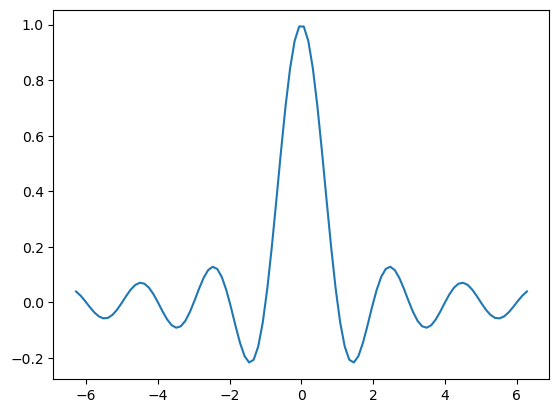

In [72]:
# Ejemplo de la documentación de Matplotlib
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)
y = np.sinc(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

Podemos modificar esos márgenes:
* cambiándolos de forma global en el diccionario *mlp.rcParams*, o 
* cambiándolos específicamente para un eje en un gráfico concreto haciendo uso del método del eje *ax.margins*.

Veamos un ejemplo:


In [76]:
# help(ax.margins)

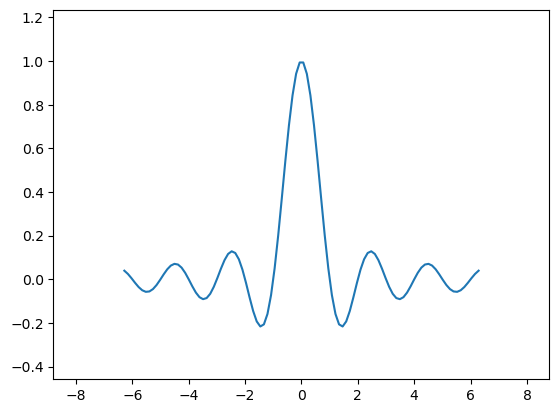

In [74]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(0.2, 0.2) # incremento notable de los valores por defecto de los márgenes X e Y
plt.show()

También podemos cambiar el margen de un eje en concreto.

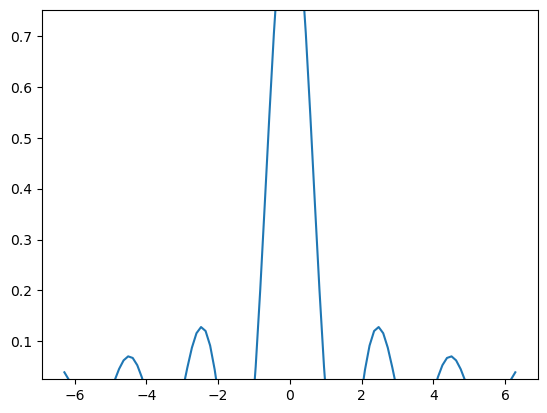

In [115]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.margins(y=-0.2) # decremento en el valor del margen Y
plt.show()

#### 6.2.12. Cambio de escala de los ejes

Hasta ahora hemos visto casos en los que la escala de los ejes es lineal. En ocasiones, necesitaremos que uno o ambos ejes se representen en escala logarítmica. Esto se consigue con los métodos *set_xscale(texto_de_escala)* y *set_yscale(texto_de_escala)*.

Pueden consultarse todas las escalas disponibles haciendo uso del siguiente código.

In [116]:
import matplotlib.scale as mscale
print(mscale.get_scale_names())

['asinh', 'function', 'functionlog', 'linear', 'log', 'logit', 'symlog']


**Escalas disponibles en Matplotlib**

| Valor del parámetro de escala | Descripción |
|:--- | :-- |
| *linear* | Escala lineal. Es el valor por defecto.  |
| *log* |  Escala logarítmica (en base 10) |
| *symlog* |  Escala logarítmica simétrica, es decir, es válida tanto para valores positivos como negativos. <br />Dado que los valores próximos a cero tienden a infty, se define un rango (que es parametrizable) en el que la escala es lineal. |
| *logit* | Escala logit para datos entre cero y uno, ambos excluidos. <br /> Esta escala es similar a una escala logarítmica cercana a cero y a uno, y casi lineal alrededor de 0,5. Asigna el intervalo $]0, 1[$ a $]-\infty, +\infty[$.  |

Veamos algunos ejemplos de los más habituales:

##### 6.2.12.1. Escala lineal

No hay que hacer nada, porque es la escala por defecto.

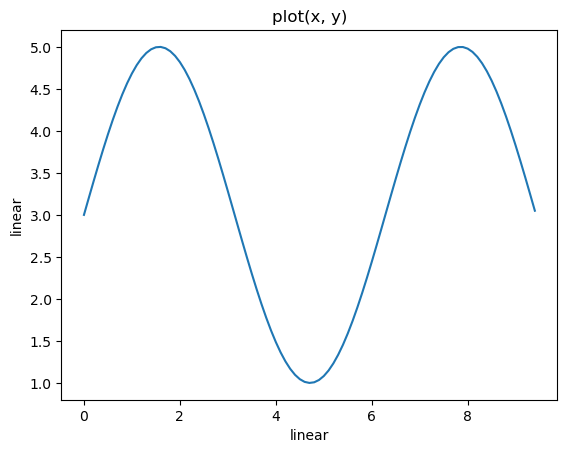

In [77]:
x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('linear') 
ax.set_ylabel('linear') 
ax.set_title('plot(x, y)')
plt.show()

##### 6.2.12.2. Escala logarítmica en el eje X

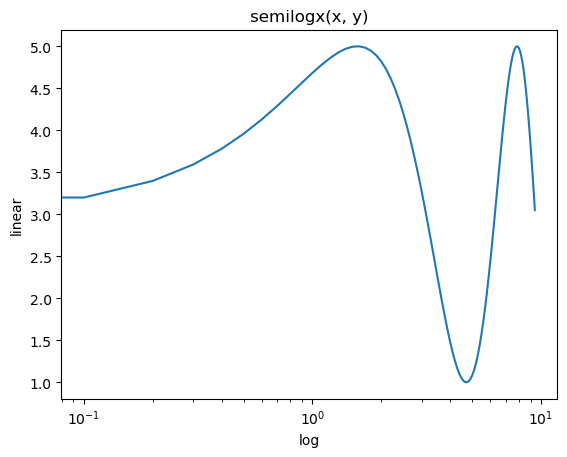

In [78]:
x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

fig, ax = plt.subplots()

ax.set_xscale('log') # en esta parte establecemos la escala logarítmica en el eje X

ax.plot(x, y)

ax.set_xlabel('log') 
ax.set_ylabel('linear')
ax.set_title('semilogx(x, y)')
plt.show()

##### 6.2.12.2. Escala logarítmica en ambos ejes

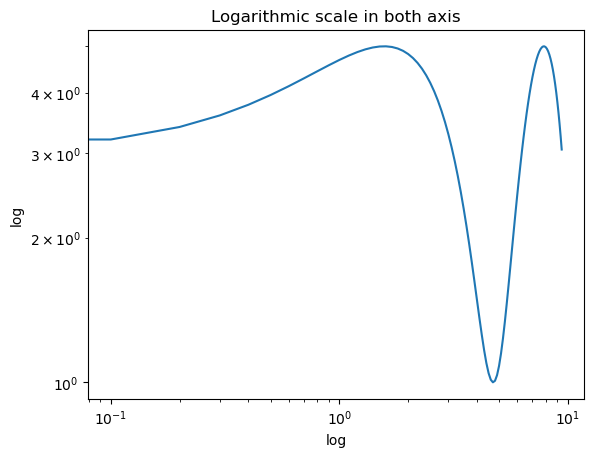

In [79]:
x = np.arange(0, 3*np.pi, 0.1)
y = 2 * np.sin(x) + 3

fig, ax = plt.subplots()

ax.set_xscale('log')  # en esta parte establecemos la escala logarítmica en el eje X
ax.set_yscale('log')  # en esta parte establecemos la escala logarítmica en el eje Y

ax.plot(x, y)

ax.set_xlabel('log')
ax.set_ylabel('log')
ax.set_title('Logarithmic scale in both axis')
plt.show()

También puede consultar la documentación en línea en: https://matplotlib.org/stable/users/explain/axes/axes_scales.html

O hacer uso de la función *help()* de Python, como muestra la siguiente celda.

In [125]:
# help(ax.set_xscale)

### 6.3. Guardar una figura en el disco duro

Se usa el método *savefig* del objeto *Figure*. Siempre hay que pasarle como parámetro la ruta de salida (*directorio de destino + nombre fichero*). Esta ruta puede ser: 
* absoluta (respecto al directorio raíz o unidad de disco) o 
* relativa (respecto al directorio donde está ubicado el notebook).

Admite múltiples parámetros como por ejemplo:
* la resolución del gráfico en dpi (*dots per inch*, o puntos por pulgada), 
* el formato de salida del fichero (*jpg*, *png*, *svg*...), 
* el color de fondo de la figura...

| Función | Definición simplificada | Descripción |
| :-- | :-- | :-- |
| savefig | *figure.savefig(fname, dpi='figure', format=None, facecolor='auto', edgecolor='auto')* | Guarda la figura en un fichero en la ruta especificada por el parámetro obligatorio *fname*.| 

Parámetros:
* *fname*, ruta en el disco duro (directorios y nombre del fichero) donde se alacenará el gráfico.
* *dpi*, es la resolución del gráfico en píxeles por pulgada (dots per inch). Si este parámetro toma su valor por defecto ('figure'), usa el valor asignado a la figura que se encuentra establecido en el diccionario *mpl.rcParams["savefig.dpi"]*.
* *format*, es el formato de salida del fichero generado a partir de la figura. El **valor por defecto** viene **dado por la extensión** del fichero de salida (*fname*). Valores posibles: 'png', 'pdf', 'svg', ... 
* *facecolor*, es el color de fondo de la figura. Por defecto: 'auto'. El color por defecto se lee del diccionario *mpl.rcParams["savefig.facecolor"]*.
* *edgecolor*, color del marco de la figura. Por defecto: 'auto' que se lee del diccionario *rcParams["savefig.edgecolor"]*.

Para este ejemplo, retomamos nuestra gráfica de una parábola donde lo dejamos anteriormente.

In [87]:
# Generación de los artistas básicos: figura y sus ejes en una misma función
fig, eje = plt.subplots() 

x = np.linspace(-4, 4, 50)

# gráfica de la parábola
parab, = eje.plot(x, -2 + 0.5 * np.power(x, 2), ls='--', color='green', lw=3, label='parábola') # Atención al parámetro 'label'
# grafica de la función lineal
linea, = eje.plot(x, x, ls='-', color='pink', lw=4) # sin etiquetar
linea.set_label('linea') # etiquetmos a posteriori haciendo uso del manejador (handle) obtenido en la llamada al método 'plot'

# Generamos título y etiquetas para los ejes
eje.set_title('Grafica multilínea')
eje.set_xlabel('Eje de abscisas')
eje.set_ylabel('Eje de ordenadas')

# Generamos una leyenda modificada y localizada 
eje.legend([linea, parab], ['Nueva etiqueta línea', 'Nueva etiqueta parábola'], loc='best')

# Establecemos los rangos en los ejes X e Y
eje.set_xlim(-2, 4) # limitamos el rango del eje X
eje.set_ylim(-3, 8) # limitamos el rango del eje Y

# Generamos posiciones para los marcadores secundarios en el eje X
eje.set_xticks(np.arange(-2.5, 4, 0.25), minor=True)
# Generamos texto que posicionaremos en marcadores primarios personalizados
eje.set_yticks(np.arange(-3, 9, 1).astype('int'), \
              ['-tres', '-dos', '-uno', 'cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho'])

# Establecemos una malla personalizada para los marcadores secundarios en el eje X
eje.grid(which='minor', axis='x', color='gray', linestyle=':', linewidth=1, alpha=0.6)
# Establecemos una malla personalizada para los marcadores primarios del eje X
eje.grid(which='major', axis='x', color='black', linestyle='-', linewidth=1, alpha=0.6)

# Guardamos esta representación en un fichero de extensión png. Otras posibilidades son: jpg, pdf, svg...
fig.savefig('./imagenes/matplolib/mi_grafica.png', dpi=150) # ruta relativa

y, a continuación, se muestra el resultado.

![Partes de una figura en Matplotlib](./imagenes/matplolib/mi_grafica.png)

## 6.4. Generación de recuadros

Un recuadro **es un gráfico que se muestra en el área de otro gráfico**. Se puede interpretar como una ampliación de una parte de la gráfica o como una gráfica secundaria que complementa la información mostrada por la principal.

Ya hemos visto y comprobado que es posible generar un objeto de la clase *figure* de forma aislada. Se hace de la siguiente forma:

In [88]:
#help(plt.figure)

In [89]:
fig = plt.figure(figsize=(10, 6), facecolor="#f1f1f1")

Se pueden agregar a posteriori el número de objetos de tipo *Axes* que deseemos:
* sólo uno, para generar una única gráfica.
* un mosaico de cualquier número de filas y columnas.
* recuadros.

El procedimiento para agregar un eje es llamar al método *add_axes* del objeto *Figure*.

In [90]:
# genero un Axes y lo agrego a mi objeto figura
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#c5c5c5")

El primer parámetro de la función *add_axes* se refiere a las dimensiones del objeto y a su posición dentro de la Figura. Dichas coordenadas se tienen la siguiente lectura 

*(left, bottom, width, height)*

donde (left, bottom) son las coordenadas de la esquina inferior izquierda del área que ocupará el eje (*Axes*) agregado a la figura. *width* y *height* son la anchura de ese área de los ejes y su altura. Esas coordenadas vienen dadas en el sistema de referencia de la figura. La siguiente imagen muestra las coordenadas de este sistema de referencia propio.

Debemos tener en cuenta el sistema de coordenadas de figura y ejes a la hora de ubicar un eje en la figura.
![Imagen del sistema de coordenadas que distribuye el área de dibujo](imagenes/matplolib/coordenadas_figura_ejes.jpg)

Mostremos con un ejemplo cómo se genera e inserta un recuadro en una figura.

In [91]:
# función a representar
def f(x):
    return 1/(1 + x**2) - 0.1/(1 + ((3 - x)/0.1)**2)

Coordenadas *x* del gráfico

In [97]:
x = np.linspace(-4, 14, 1000)

Genero la representación gráfica 

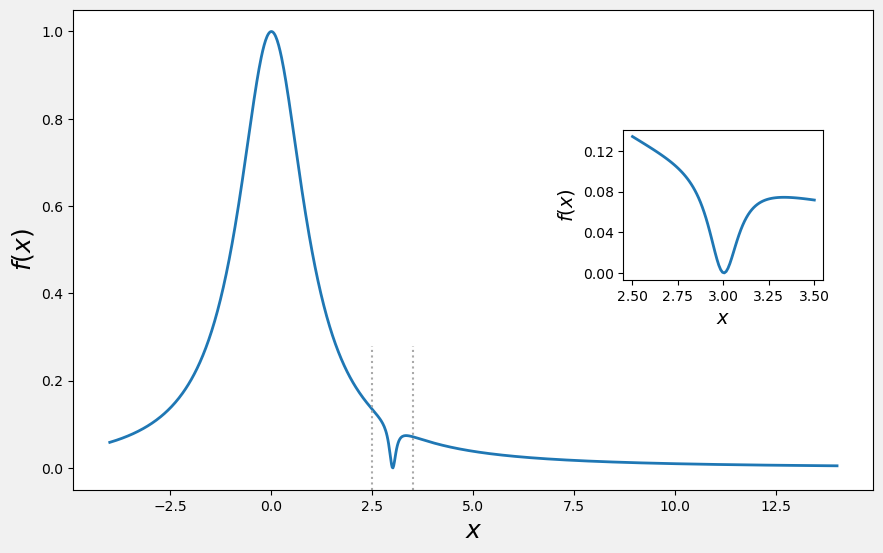

In [98]:
fig = plt.figure(figsize=(10, 6), facecolor="#f1f1f1")

# genero un Axes y lo agrego a mi objeto figura
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="white")

# gráfica principal
ax.plot(x, f(x), linewidth=2)

# Generamos las etiquetas de los ejes.
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

# ahora voy a fijarme en una parte interesante de la representación.
# la voy a ampliar e "incrustar" en el gráfico principal

# area de zoom
x0, x1 = 2.5, 3.5

# delimito visualmente la zona de zoom en el gráfico principal por dos lineas verticales de extensión limitada.
ax.axvline(x0, ymax=0.3, color="darkgrey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="darkgrey", linestyle=":")

# genero el *Axes* del recuadro. Atención a su ubicación y dimensiones (primer parámetro)
ax_insert = fig.add_axes([0.65, 0.5, 0.20, 0.25], facecolor='white')

# genero las coordenadas x para el recuadro
x = np.linspace(x0, x1, 100)
# genero la gráfica del recuadro
ax_insert.plot(x, f(x), linewidth=2)
# Establezco el número máximo de marcadores primarios del eje X del recuadro a 5
ax_insert.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
# En el eje secundario será un máximo de 4
ax_insert.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

# genero las etiquetas de los ejes del recuadro
ax_insert.set_xlabel(r"$x$", fontsize=14)
ax_insert.set_ylabel(r"$f(x)$", fontsize=14)

# Muestro el gráfico
plt.show()

## 7. Tipos de gráficas 2D

Seleccionamos y mostramos a través de ejemplos aquellas gráficas 2D de uso más común.

### 7.1. Gráficas de tipo step

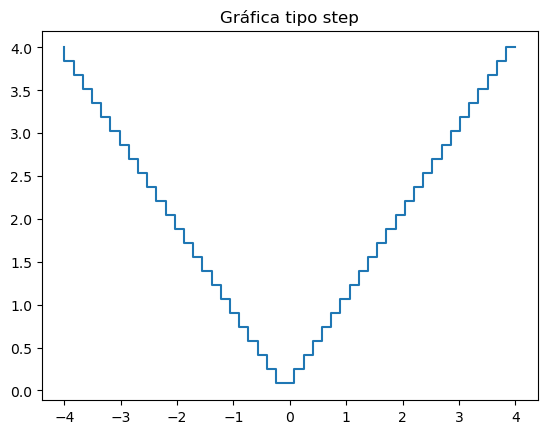

In [152]:
x = np.linspace(-4, 4, 50)

fig, ax = plt.subplots()
ax.step(x, np.abs(x))
ax.set_title('Gráfica tipo step')
plt.show()

### 7.2. Gráficas de barras

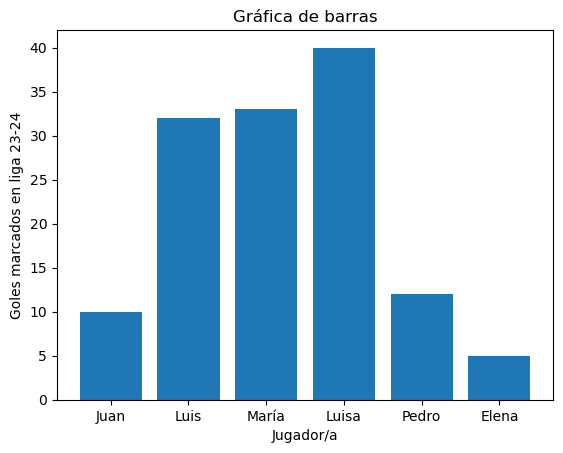

In [153]:
### Gráfica de tipo barra

y2 = np.array([10, 32, 33, 40, 12, 5])
x2 = np.array(['Juan', 'Luis', 'María', 'Luisa', 'Pedro', 'Elena'])
fig, ax = plt.subplots()
ax.bar(x2, y2)
ax.set_title('Gráfica de barras')
ax.set_ylabel('Goles marcados en liga 23-24')
ax.set_xlabel('Jugador/a')
plt.show()

### 7.3. Histogramas

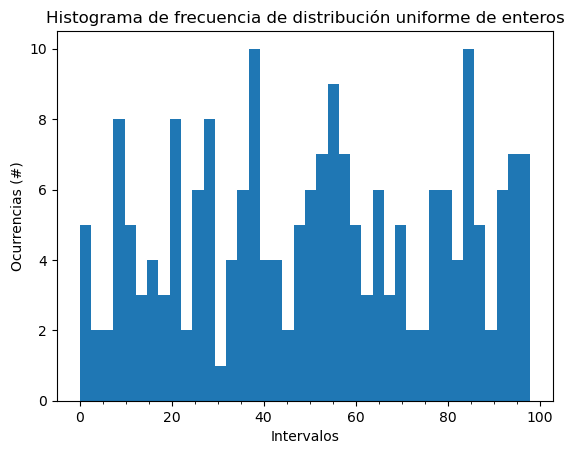

In [154]:
import numpy.random

valores = np.random.randint(0, 100, 200)
fig, ax = plt.subplots()
ax.hist(valores, bins=40, align='mid')
ax.set_title('Histograma de frecuencia de distribución uniforme de enteros')
ax.set_ylabel('Ocurrencias (#)')
ax.set_xlabel('Intervalos')
ax.set_xticks(np.arange(0, 100.1, 5), minor=True)
plt.show()

### 7.4. Diagrama de caja y bigotes

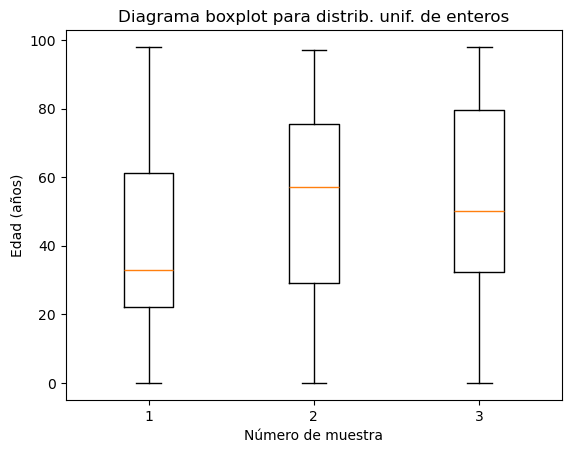

In [103]:
import numpy.random

valores = np.random.randint(0, 100, (50, 3))

fig, ax = plt.subplots()
ax.boxplot(valores)
ax.set_title('Diagrama boxplot para distrib. unif. de enteros')
ax.set_ylabel('Edad (años)')
ax.set_xlabel('Número de muestra')
plt.show()

### 7.5. Diagrama de tarta

In [111]:
# datos
etiquetas = ['Diesel', 'Gasolina', 'Híbrido', 'Eléctrico']
ventas = [200, 840, 350, 100]
desplazamiento = (0, 0, 0, 0.1)  # sacamos un poco el fragmento del cuarto componente ('Eléctrico')

fig, ax = plt.subplots()
ax.pie(ventas, explode=desplazamiento, labels=etiquetas, autopct='%1.1f%%', \
       shadow=True, startangle=0)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Ventas de coches en Marzo 2024')
plt.show()

### 7.6. Diagrama de errores

In [155]:
x = np.arange(100)
y = 2 * x + 1
yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10

fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=np.abs(yerr))
ax.set_title('Grafica con errores en el eje Y')
plt.show()

In [156]:
# help(numpy.random.normal)
# help(ax.errobar)

### 7.7. Diagramas de dispersión (*scattering*)

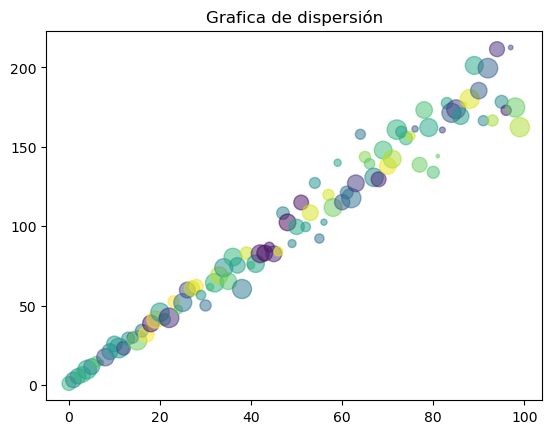

In [157]:
x = np.arange(100)
y = 2 * x + 1

yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
sizes = numpy.random.randint(5, 200, 100)
colors = numpy.random.rand(100)
plt.close()

fig, ax = plt.subplots()
ax.scatter(x, y + yerr, s=sizes, c=colors, alpha=0.5)
ax.set_title('Grafica de dispersión')
plt.show()



In [ ]:
# help(ax.scatter)

In [ ]:
# help(ax.set_yticks)

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar los ejercicios 6, 7 y 8.

---

## 8. Generación de varias gráficas en la misma figura

Lo más habitual es generar la figura (*Figure*) y los ejes (*Axes*) que necesitamos para representar la información de interés.

| Función | Definición simplificada | Descripción|
|:-- | :--- |:---|
|subplots | *plt.subplots(nrows=1, ncols=1, figsize=mpl.rcParams['figure.figsize'], **subplot_kw)* | Que genera una figura con una distribución tabular de gráficas de <br />*nrows* filas x *ncols* columnas.<br />En su forma más simple se llamaría así: *plt.subplots()*|
| subplot_mosaic  | *plt.subplot_mosaic(mosaic)*  | Que genera una distribución de gráficas personalizada. *mosaic* puede ser una lista de listas o una cadena de caracteres. |

### 8.1. Distribución tabular de gráficas

Ya hemos usado la función *subplots* para generar figuras con una sola gráfica. También sirve para generar varias en formato matricial de filas y columnas.

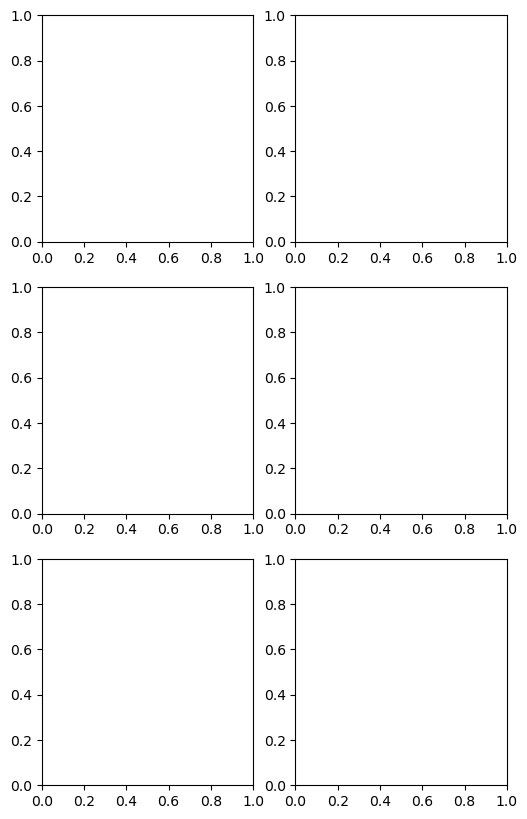

In [112]:

fig, axes = plt.subplots(figsize=(6, 10), nrows=3, ncols=2) # una figura y 3x2 axes
plt.show()

**¿Cómo se hace para generar una gráfica en cada una de los *Axes* generados?**

En nuestro caso de 3x2 Axes, podemos hacer referencia a cada uno de ellos con la variables *ax* resultado de la llamada a *plt.subplots* y poniendo entre corchetes las coordenadas del eje en la plantilla generada.

Si la plantilla es de una sola fila o columna, bastará un único índice, en la forma 

Si la plantilla generada por *subplots* tiene varias filas y columnas usaremos indexación de array 2D, es decir 

Pongamos un ejemplo más sencillo para ver su funcionamiento.

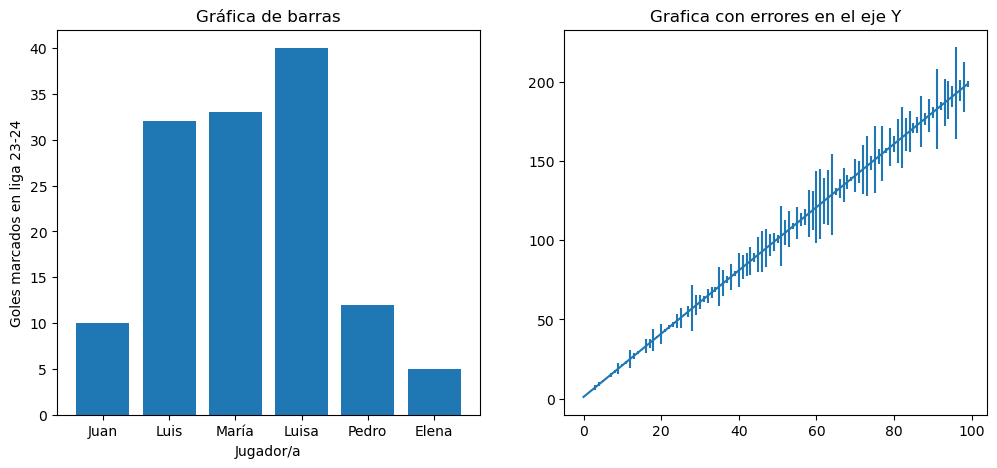

In [117]:
plt.close()
fig, axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2) # una figura y 1x2 axes

# Primer *Axes*
y2 = np.array([10, 32, 33, 40, 12, 5])
x2 = np.array(['Juan', 'Luis', 'María', 'Luisa', 'Pedro', 'Elena'])
axes[0].bar(x2, y2)
axes[0].set_title('Gráfica de barras')
axes[0].set_ylabel('Goles marcados en liga 23-24')
axes[0].set_xlabel('Jugador/a')

# Segundo *Axes*
x = np.arange(100)
y = 2 * x + 1
yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
axes[1].errorbar(x, y, yerr=np.abs(yerr))
axes[1].set_title('Grafica con errores en el eje Y')

plt.show()

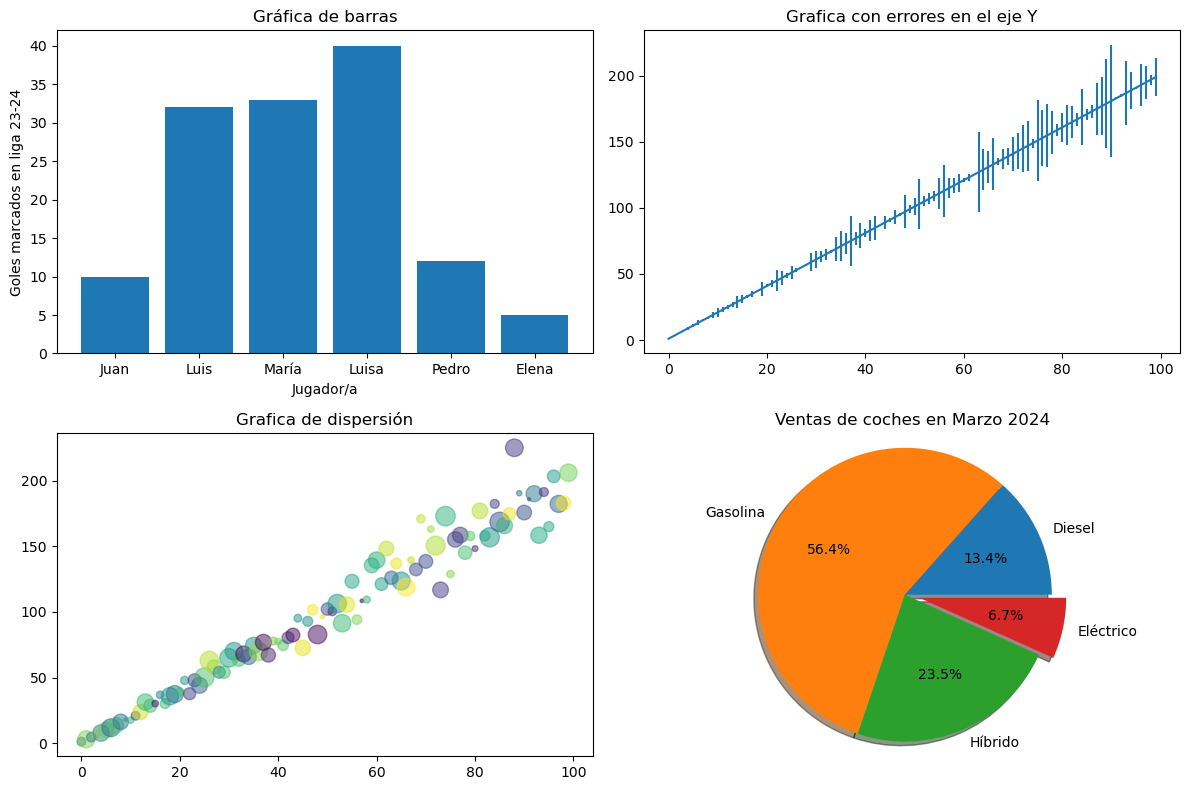

In [122]:
# este mismo ejemplo usando índices para filas y columnas
plt.close()
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=2) # una figura y 2x2 axes

# Primer *Axes*
y2 = np.array([10, 32, 33, 40, 12, 5])
x2 = np.array(['Juan', 'Luis', 'María', 'Luisa', 'Pedro', 'Elena'])
axes[0, 0].bar(x2, y2)
axes[0, 0].set_title('Gráfica de barras')
axes[0, 0].set_ylabel('Goles marcados en liga 23-24')
axes[0, 0].set_xlabel('Jugador/a')

# Segundo *Axes*
x = np.arange(100)
y = 2 * x + 1
yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
axes[0, 1].errorbar(x, y, yerr=np.abs(yerr))
axes[0, 1].set_title('Grafica con errores en el eje Y')

# Tercer *Axes*
x = np.arange(100)
y = 2 * x + 1

yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
sizes = numpy.random.randint(5, 200, 100)
colors = numpy.random.rand(100)

axes[1,0].scatter(x, y + yerr, s=sizes, c=colors, alpha=0.5)
axes[1,0].set_title('Grafica de dispersión')

# Cuarto *Axes*
etiquetas = ['Diesel', 'Gasolina', 'Híbrido', 'Eléctrico']
ventas = [200, 840, 350, 100]
desplazamiento = (0, 0, 0, 0.1)  # sacamos un poco el fragmento del cuarto componente ('Eléctrico')

axes[1, 1].pie(ventas, explode=desplazamiento, labels=etiquetas, autopct='%1.1f%%', \
       shadow=True, startangle=0)
axes[1, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[1, 1].set_title('Ventas de coches en Marzo 2024')

# Ajusto la plantilla para una visualizacion óptima
plt.tight_layout()

plt.show()

---

**Ejercicios:** Con lo que acabamos de ver, intente realizar el ejercicio 9.

---

### 8.2. Mosaico de gráficas

En ocasiones, deseamos generar un mosaico asimétrico de gráficas. Son aquellos en los que no todas las filas tienen el mismo número de columnas o a la inversa.

Para su generación usamos la función *subplot_mosaic* de *pyplot*.

Aprenderemos a través de un ejemplo y completaremos las posibilidades con la ayuda en línea de comandos o de la documentación oficial de *Matplotlib*. Son tantas las posibilidades que hay que saber mencionar los puntos importantes y dejar los detalles para un estudio individual más pausado.

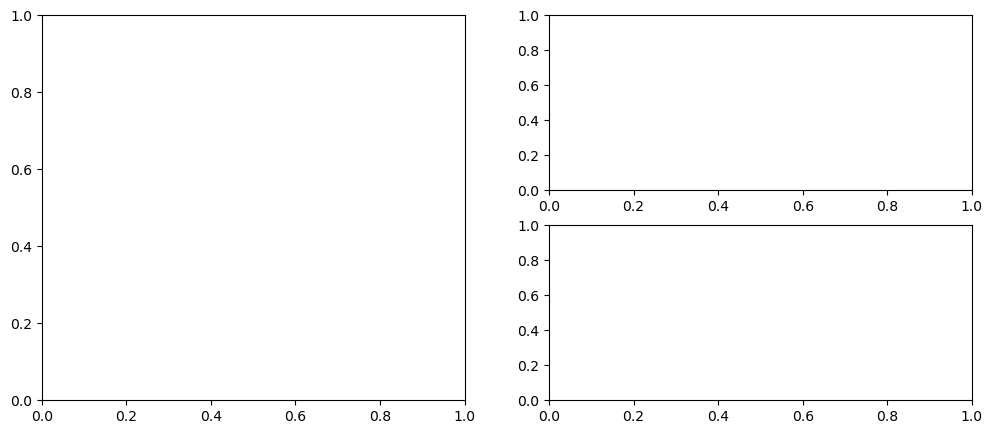

In [123]:
# Los valores de la lista de lista que son iguales definen filas o columnas que se fusionan
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']], figsize=(12, 5))
plt.show()

El primer parámetro de la función *subplot_mosaic* puede ser de tipo cadena de caracteres también. Cada letra corresponde a una gráfica de la figura. Un retorno de carro define una nueva fila.

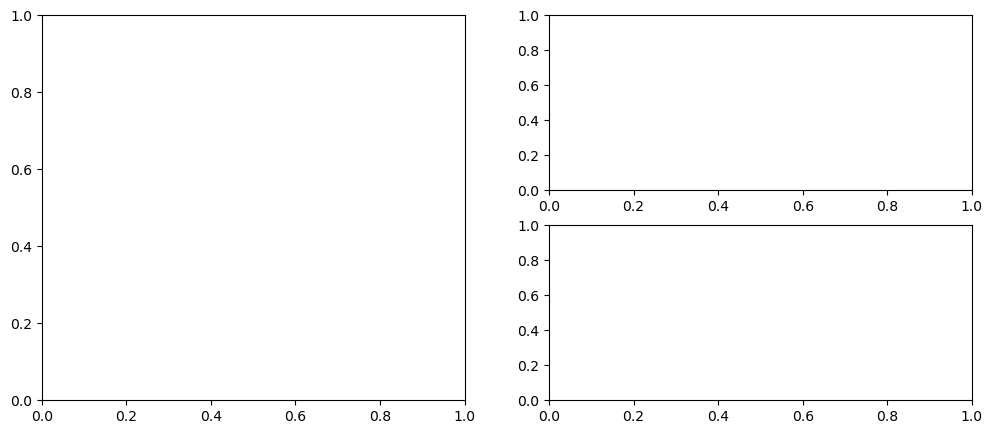

In [124]:
# Equivalente a la anterior pero con cadenas de caracteres
fig, axs = plt.subplot_mosaic("""AB
AC
""", figsize=(12, 5)) 
# Como 'A se repite en la primera columna de dos filas, ocupa toda la parte de la izquierda. 
# Arriba a la derecha ('B') y abajo a la derecha ('C') representan dos Axes (cadenas de caracteres) diferentes

plt.show()

In [125]:
# help(plt.subplot_mosaic)

Veamos en este segundo caso la forma en la que acceder a las gráficas.

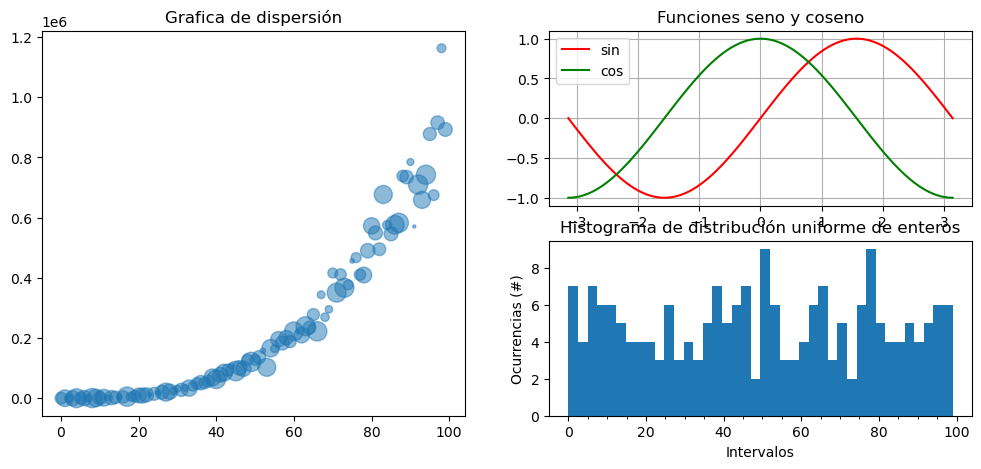

In [126]:
# defino mi mosaico de gráficas
fig, axs = plt.subplot_mosaic("""AB
AC
""", figsize=(12, 5))

# trabajo en la primera gráfica (referenciada por la letra 'A')
x = np.arange(100)
y = np.power(x, 3)
yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
sizes = numpy.random.randint(5, 200, 100)

axs['A'].scatter(x, y + yerr, s=sizes, alpha=0.5) # Acceso al eje etiquetado como 'A' en la función subplot_mosaic
axs['A'].set_title('Grafica de dispersión')

# trabajo en la segunda gráfica
x2 = np.linspace(-np.pi, np.pi, 100)
axs['B'].plot(x2, np.sin(x2), 'r-', label='sin') # Acceso al eje etiquetado como 'B' en la función subplot_mosaic
axs['B'].plot(x2, np.cos(x2), 'g-', label='cos')
axs['B'].grid()
axs['B'].legend()
axs['B'].set_title('Funciones seno y coseno')

# trabajo en la tercera gráfica
valores = np.random.randint(0, 100, 200)
axs['C'].hist(valores, bins=40, align='mid') # Acceso al eje etiquetado como 'C' en la función subplot_mosaic
axs['C'].set_title('Histograma de distribución uniforme de enteros')
axs['C'].set_ylabel('Ocurrencias (#)')
axs['C'].set_xlabel('Intervalos')
axs['C'].set_xticks(np.arange(0, 100.1, 5), minor=True)
plt.show()

In [ ]:
help(plt.subplot_mosaic)

**Corregimos los espacios entre gráficas para que no se superpongan** etiquetas de ejes, con títulos, o cualquier otro *Artista*.

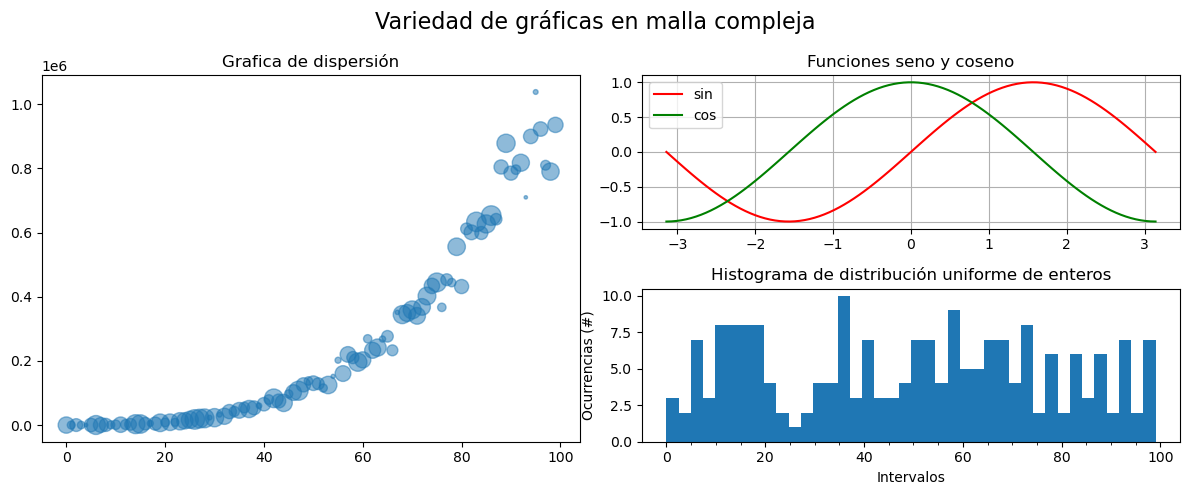

In [127]:
# defino mi mosaico de gráficas
fig, axs = plt.subplot_mosaic("""AB
AC
""", figsize=(12, 5))

# trabajo en la primera gráfica (referenciada por la letra 'A')
x = np.arange(100)
y = np.power(x, 3)
yerr = numpy.random.normal(loc=0.0, scale=1.0, size=100) * y / 10
sizes = numpy.random.randint(5, 200, 100)

axs['A'].scatter(x, y + yerr, s=sizes, alpha=0.5)
axs['A'].set_title('Grafica de dispersión')

# trabajo en la segunda gráfica
x2 = np.linspace(-np.pi, np.pi, 100)
axs['B'].plot(x2, np.sin(x2), 'r-', label='sin')
axs['B'].plot(x2, np.cos(x2), 'g-', label='cos')
axs['B'].grid()
axs['B'].legend()
axs['B'].set_title('Funciones seno y coseno')

# trabajo en la tercera gráfica
valores = np.random.randint(0, 100, 200)
axs['C'].hist(valores, bins=40, align='mid')
axs['C'].set_title('Histograma de distribución uniforme de enteros')
axs['C'].set_ylabel('Ocurrencias (#)')
axs['C'].set_xlabel('Intervalos')
axs['C'].set_xticks(np.arange(0, 100.1, 5), minor=True)

# Agrego el título principal
fig.suptitle('Variedad de gráficas en malla compleja', fontsize=16)

# Ajusto la plantilla para una visualizacion óptima
plt.tight_layout()

plt.show()

## Compatir ejes en la misma figura

Cuando generamos varias gráficas en la misma figura, en ocasiones necesitamos que los rangos, ticks y valores sean los mismos para realizar una comparación visual "limpia".

Podemos compartir los ejes de abscisas, los de ordenadas o ambos. Una vez activada esta compartición, se hará efectiva en **todas** las gráficas de la figura.

Veamos un ejemplo.

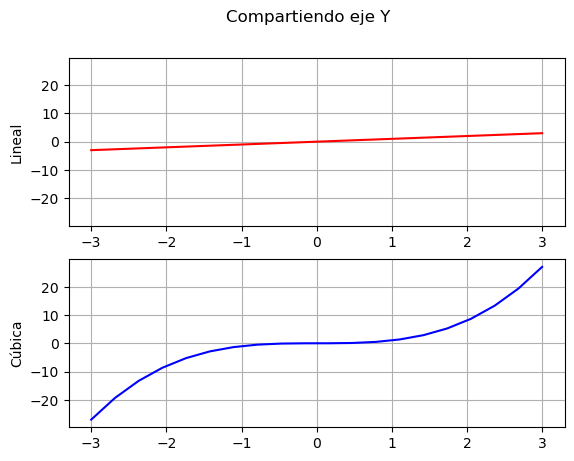

In [129]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharey=True) # ATENCION al parámetro 'sharey'

xs = np.linspace(-3, 3, 20)

axs[0].plot(xs, xs, color='red')
axs[0].set_ylabel('Lineal')
axs[0].grid()

axs[1].plot(xs, np.power(xs, 3), color='blue')
axs[1].set_ylabel('Cúbica')
axs[1].grid()

fig.suptitle('Compartiendo eje Y') # titulo de la figura (no de alguno de los *Axes*)

plt.show()

Observe cómo los **rangos y marcas sobre los ejes de ordenadas son exactamente iguales**.

Si, a posteriori cambiamos el rango en uno de los subplots deberia cambiar en todos.

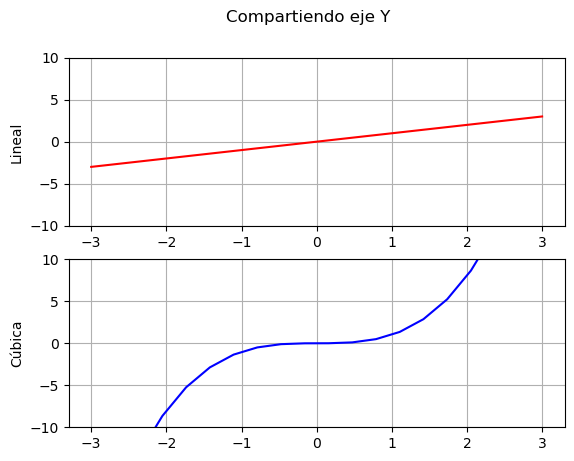

In [130]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharey=True)

xs = np.linspace(-3, 3, 20)

axs[0].plot(xs, xs, color='red')
axs[0].set_ylabel('Lineal')
axs[0].grid()
axs[0].set_ylim(-10, 10)

axs[1].plot(xs, np.power(xs, 3), color='blue')
axs[1].set_ylabel('Cúbica')
axs[1].grid()

fig.suptitle('Compartiendo eje Y')

plt.show()

## 9. Gráficos en mallas regulares

Las mallas regulares distribuyen de forma homogénea en la superficie los elementos que componen un gráfico. Dichos elementos se encuentran regularmente espaciados en las coordenadas (x, y) para gráficos 2D o (x, y, z) para gráficos 3D. A cada elemento de la malla se le asocia un valor numérico.

Ejemplos de mallas regulares son las que se dan en las imágenes ráster, compuestas de píxeles de geometría cuadrada o rectangular, con coordenadas para los centros de cada uno de ellos establecidas de antemano.

Es posible generar mallas regulares 2D a partir de arrays 1D en Python. Para ello hacemos uso de la función *meshgrid* de NumPy.

In [132]:
# help(np.meshgrid)

In [133]:
import numpy as np

x = np.arange(-2, 3)
y = np.arange(-5, 6, 2)

print('Arrays de partida')
print('x ->', x)
print('y ->', y)

X, Y = np.meshgrid(x, y)
print('Coordenadas de la malla:')
print('X ->', X)
print('Y ->', Y)

Arrays de partida
x -> [-2 -1  0  1  2]
y -> [-5 -3 -1  1  3  5]
Coordenadas de la malla:
X -> [[-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]
 [-2 -1  0  1  2]]
Y -> [[-5 -5 -5 -5 -5]
 [-3 -3 -3 -3 -3]
 [-1 -1 -1 -1 -1]
 [ 1  1  1  1  1]
 [ 3  3  3  3  3]
 [ 5  5  5  5  5]]


Podemos usar esa malla generada como las variables de una función bidimensional para, de esa forma, obtener la el valor de esa función en cada uno de los puntos definidos por la malla en la forma

$z = f(x, y)$

In [134]:
new_x = np.linspace(-np.pi, np.pi, 200)
new_y = np.linspace(-np.pi, np.pi, 200)

X, Y = np.meshgrid(new_x, new_y)
z = np.cos(X * np.pi) * np.sin(Y * np.pi)

Mostramos ahora gráficamente el resultado de graficar la función *z*

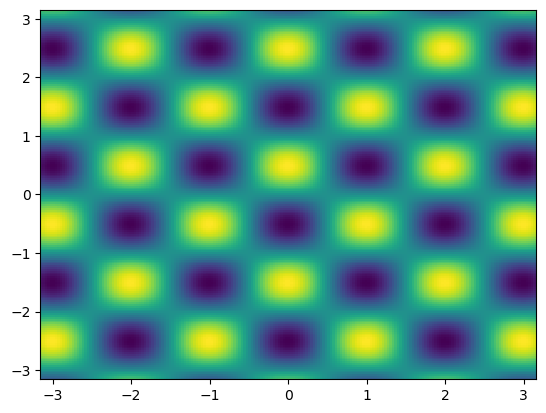

In [135]:
fig, ax = plt.subplots()

ax.pcolor(X, Y, z)
plt.show()

Ahora vendría bien una barra de color para saber la correspondencia entre color y valor de la función *z* para cada coordenada (X, Y).

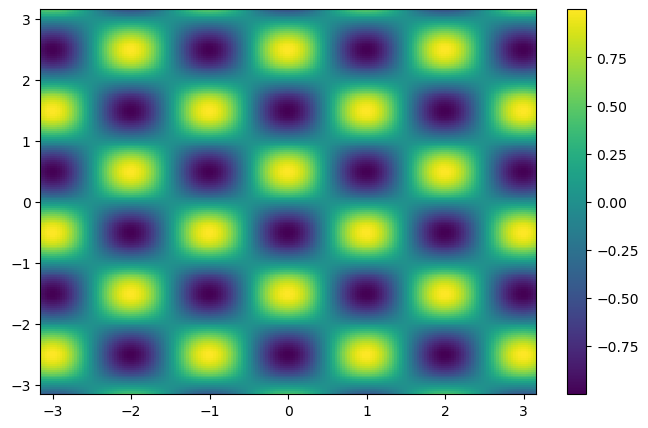

In [136]:
fig, ax = plt.subplots(figsize=(8, 5))

p = ax.pcolor(X, Y, z)
cb = fig.colorbar(p, ax=ax) # generamos una barra de color de escala dada por los valores de z
plt.show()

La paleta de colores se puede personalizar. Puede verlo en: https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html

También existen paletas prefefinidas. Puede obtener un listado usando la siguiente instrucción:

In [ ]:
from matplotlib import colormaps
list(colormaps)

Puede ver colores y secuencia de los mismos en esta dirección web de la documentación oficial.

Para usar una paleta de colores en concreto, debe especificar su nombre en el parámetro *cmap* (la paleta por defecto es la que se llama 'viridis'). 

In [ ]:
#help(ax.pcolor)

Cambiamos la paleta de colores de muestro ejemplo a una llamada "coolwarm".

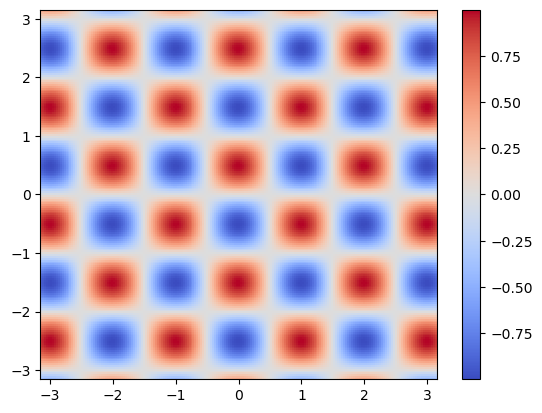

In [137]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, z, cmap='coolwarm')
cb = fig.colorbar(p, ax=ax)
plt.show()

Por defecto, **la paleta de colores se adapta al rango de valores de la gráfica** (*z*), es decir, que asigna 
* un color de su extremo al valor mínimo representado y 
*el otro color extremos al máximo. 

Si hay valores que distosionan su representación (valores extremos) o desea establecer un umbral de forma artificial o quiere resaltar un rango de valores, puede normalizar su paleta a esos valores.

También puede restringir o ampliar el rango de la paleta asignando valores dentro de los que se obtienen en *z* o fuera de ellos.

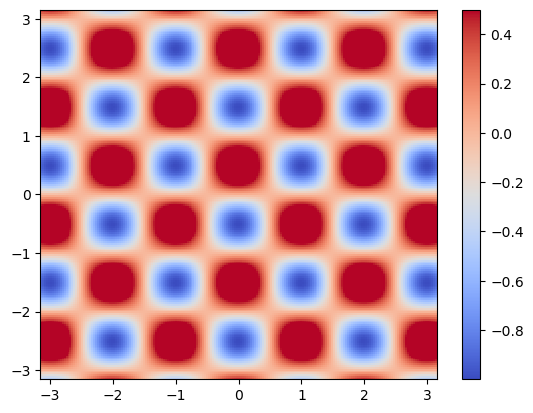

In [138]:
fig, ax = plt.subplots()
normalizacion = mpl.colors.Normalize(vmin=z.min(), vmax=0.5)
p = ax.pcolor(X, Y, z, norm=normalizacion, cmap='coolwarm')
cb = fig.colorbar(p, ax=ax)
plt.show()

En este caso, dado que el rango máximo de la paleta se ha asignado a 0.5, todos los valores mayores o iguales tienen asignado el color rojo más intenso.

Este procedimiento serviría para establecer de manera visual un umbral máximo. Por ejemplo, sería útil para visualizar *pixeles* cerca de la medida de saturación y que, por lo tanto, no tendrían que ser tenidos en cuenta.

También es posible **normalizar asignando una escala diferente de la lineal** a los colores. Habrá casos en los que una representación logartímica de la escala resulte más conveniente. 

Veamos el siguiente ejemplo.

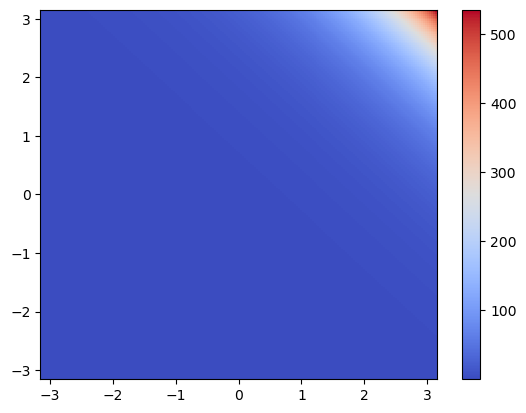

In [142]:
z = np.exp(X + Y) # z toma valores exponenciales

fig, ax = plt.subplots()
normalizacion = mpl.colors.Normalize(vmin=z.min(), vmax=z.max()) # escala de colores lineal
p = ax.pcolor(X, Y, z, norm=normalizacion, cmap='coolwarm')
cb = fig.colorbar(p, ax=ax)
plt.show()

En escala lineal los valores extremos ocultan toda la variabilidad. Probamos a cambiar la escala a *lognormal*.

Mas información en la documentación oficial de *Matplotlib*: https://matplotlib.org/stable/api/colors_api.html

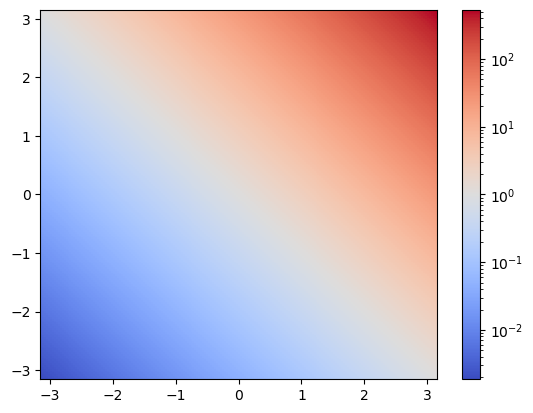

In [143]:
z = np.exp(X + Y)
fig, ax = plt.subplots()
normalizacion = mpl.colors.LogNorm(vmin=z.min(), vmax=z.max()) # escala de colores lognorm
p = ax.pcolor(X, Y, z, norm=normalizacion, cmap='coolwarm')
cb = fig.colorbar(p, ax=ax)
plt.show()

# Gráficos 3D

Podemos visualizar dependencias funcionales del tipo $z = f(x, y)$ como las anteriores usando la coordenada z como una dimensión más en vez de asignarle un color en una representación 2D. De igual forma, podríamos querer representar gráficas de dispersión en 3D, donde cada punto dado por las coordenadas (x, y, x) representara la posición de un objeto de interés en el espacio.

En Matplotlib, dibujar en 3S implica el uso de un objeto diferente llamado *Axes3D* disponible en el módulo *mpl_toolkits.mplot3d*.

Usaremos la función *plt.subplots* como hemos venido haciendo hasta ahora. La diferencia es que le pasaremos un parámetro que le indicará que queremos trabajar en 3D. Ese parámetro se llama *subplot_kw*, y es un diccionario al que se pueden agregar múltiples pares clave-valor. La que nos interesa es 'proyection' y el valor asignado será '3d'.
Veamos cómo quedaría la instrucción.

In [144]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

In [145]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

Ahora nuestro objeto *ax* es de tipo *Axes3D* y dispone de sus propias funciones para generar gráficas. Algunas de ellas son generalizaciones de las representaciones 2D como las siguiente en las que vamos a usar los graficos de tipo 
* linea (*plot*)
* dispersión (*scatter*)

Como siempre, si desea más información o personalización, consulte a través de la función *help()* de Python.

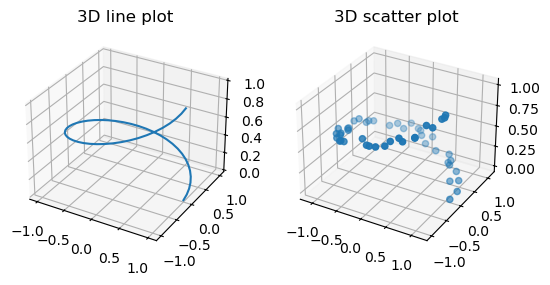

In [153]:
fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': '3d'})
N = 50
theta = np.linspace(0, 2*np.pi, N)
x = np.cos(theta)
y = np.sin(theta)
z = np.linspace(0, 1, N)
# first 3D subplot
ax[0].plot(x, y, z)
ax[0].set_title('3D line plot')
# second 3D subplot
x = np.cos(theta) + np.random.randn(N)/10
y = np.sin(theta) + np.random.randn(N)/10
z = np.linspace(0, 1, N)
ax[1].scatter(x, y, z)
ax[1].set_title('3D scatter plot')
plt.show()

Finalizamos con otros 3 gráficos disponibles en el objeto *Axes3D*.

Usaremos tres de ellas:
* *plot_surface* para graficar la superficie de un objeto 3D.
* *plot_wireframe* para graficar un objeto 3D como una malla.
* *contour* para dibujar en cada uno de los tres planos del espacio los contornos del objeto 3D.

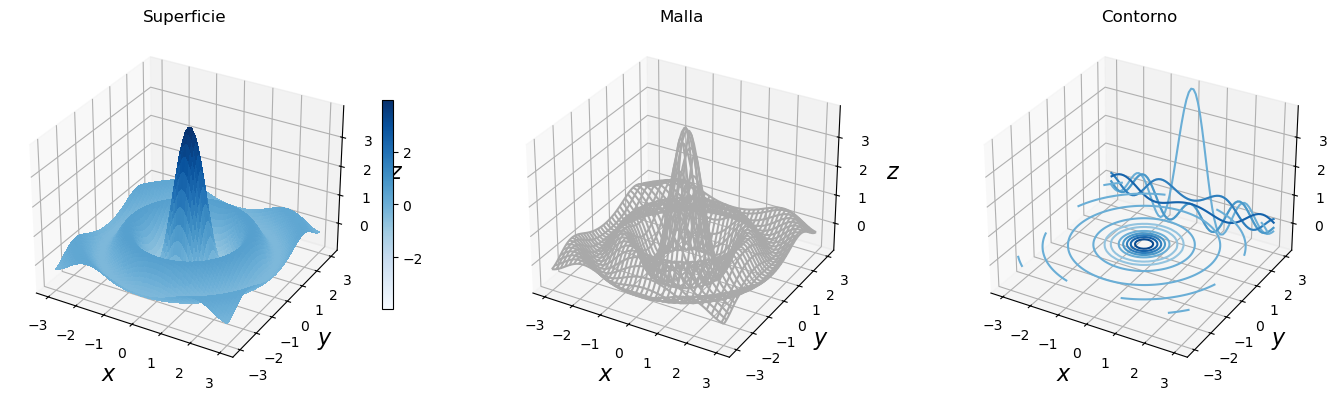

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

# Definimos una función para simplificar el etiquetado de los ejes y el título
def title_and_labels(ax, titulo):
    ax.set_title(titulo)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
#generamos la malla 2D
X, Y = np.meshgrid(x, y)

# las dos siguientes instrucciones definen una función sinc
R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "Superficie")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "Malla")

cset = axes[2].contour(X, Y, Z, zdir="z", offset=0, norm=norm, cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir="y", offset=3, norm=norm, cmap=mpl.cm.Blues)
title_and_labels(axes[2], "Contorno")

# Ajusto la plantilla para una visualizacion óptima
plt.tight_layout()

plt.show()